In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('./young-people-survey/responses.csv')
dataset.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock           ...             Age  \
0      1.0  5.0   5.0                1.0           ...            20.0   
1      2.0  3.0   5.0                4.0           ...            19.0   
2      5.0  3.0   5.0                3.0           ...            20.0   
3      1.0  2.0   2.0                1.0           ...            22.0   
4      3.0  5.0   3.0                1.0           ...            20.0   

   Height  Weight  Number of siblings  Gender  Left - right handed  \
0   163.0    48.0                 1.0  female         right handed   
1   163.0    58.0                 2.0  female         right handed   
2   176.0    67.0                 2.0  female         right handed   
3   172.0    59.0                 1.0  female         right handed   
4   170.0    59.0                 1.0  female         right handed   

                 Education  Only child  Village - town  House - block of flats  
0  college/bachelor degree          no         village          block of flats  
1  college/bachelor degree          no            city          block of flats  
2         secondary school          no            city          block of flats  
3  college/bachelor degree         yes            city          house/bungalow  
4         secondary school          no         village          house/bungalow  

[5 rows x 150 columns]

In [4]:
print("values for Smoking:")
print(dataset.Smoking.unique())
print("values for Alcohol:")
print(dataset.Alcohol.unique())
print("values for Punctuality:")
print(dataset.Punctuality.unique())
print("values for Lying:")
print(dataset.Lying.unique())
print("values for Internet usage:")
print(dataset['Internet usage'].unique())
print("values for Gender:")
print(dataset.Gender.unique())
print("values for Education:")
print(dataset.Education.unique())
print("values for Only child:")
print(dataset['Only child'].unique())
print("values for left - right handed:")
print(dataset['Left - right handed'].unique())
print("values for Village - town:")
print(dataset['Village - town'].unique())
print("values for House - block of flats:")
print(dataset['House - block of flats'].unique())

values for Smoking:
['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan]
values for Alcohol:
['drink a lot' 'social drinker' 'never' nan]
values for Punctuality:
['i am always on time' 'i am often early' 'i am often running late' nan]
values for Lying:
['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan]
values for Internet usage:
['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all']
values for Gender:
['female' 'male' nan]
values for Education:
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
values for Only child:
['no' 'yes' nan]
values for left - right handed:
['right handed' 'left handed' nan]
values for Village - town:
['village' 'city' nan]
values for House - block of flats:
['block of flats' 'house/bungalow' nan]


## Feature exploration

Let's see if, considering features with strings value, they have very rare values that we can merge together, or let's see how the age values are distributed and if it makes sense to encode them in a certain way.

In [5]:
pd.value_counts(dataset.Smoking)

tried smoking     430
never smoked      208
current smoker    189
former smoker     175
Name: Smoking, dtype: int64

In [6]:
pd.value_counts(dataset.Alcohol)

social drinker    659
drink a lot       222
never             124
Name: Alcohol, dtype: int64

In [7]:
pd.value_counts(dataset.Lying)

sometimes                        549
only to avoid hurting someone    270
everytime it suits me            138
never                             51
Name: Lying, dtype: int64

In [8]:
pd.value_counts(dataset.Punctuality)

i am always on time        399
i am often early           327
i am often running late    282
Name: Punctuality, dtype: int64

In [9]:
pd.value_counts(dataset.Education)

secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: Education, dtype: int64

given this, we can merge currently a primary school pupil with primary school, also looking the Age Column cannot be persons that are currently doing the primary school, considering that the youngest are 15.
We cannot delete 10 rows of the dataset, even if we have to take into account that these rows can possibly contain more mistakes. 

In [10]:
pd.value_counts(dataset['Internet usage'])

few hours a day            744
less than an hour a day    139
most of the day            124
no time at all               3
Name: Internet usage, dtype: int64

In [11]:
pd.value_counts(dataset.Age)

19.0    210
20.0    194
21.0    127
18.0    123
22.0     84
17.0     53
23.0     47
25.0     30
16.0     29
24.0     28
28.0     17
26.0     15
27.0     14
29.0     11
15.0     11
30.0     10
Name: Age, dtype: int64

As we can see from Ages values, is not possible to have someone that is currently a primary school pupil, can this is an error?

In [12]:
pd.value_counts(dataset.Weight)

60.0     76
55.0     62
70.0     51
80.0     50
65.0     49
75.0     41
50.0     41
58.0     31
57.0     31
53.0     28
63.0     28
62.0     26
54.0     25
52.0     23
68.0     23
56.0     22
48.0     21
85.0     20
78.0     19
67.0     18
64.0     18
90.0     17
72.0     16
83.0     15
76.0     15
77.0     15
51.0     14
49.0     13
74.0     12
73.0     11
         ..
61.0      7
79.0      6
95.0      5
45.0      5
92.0      5
89.0      5
46.0      5
86.0      4
120.0     3
96.0      3
44.0      3
87.0      3
98.0      3
93.0      3
100.0     3
91.0      2
97.0      2
43.0      2
113.0     1
99.0      1
125.0     1
150.0     1
111.0     1
42.0      1
110.0     1
105.0     1
101.0     1
41.0      1
103.0     1
165.0     1
Name: Weight, Length: 69, dtype: int64

165.0 and 150.0 are clearly outliers, maybe they can be heights instead of weights,I want to remove them as may be wrong

In [13]:
dataset = dataset[dataset.Weight != 150.0]
dataset = dataset[dataset.Weight != 165.0]

In [14]:
pd.value_counts(dataset.Height)

170.0    86
168.0    62
175.0    56
180.0    55
165.0    54
185.0    43
178.0    43
173.0    41
172.0    38
163.0    34
167.0    29
160.0    28
183.0    24
171.0    23
164.0    23
176.0    22
182.0    22
162.0    20
169.0    19
187.0    19
184.0    19
174.0    19
177.0    18
166.0    18
190.0    17
186.0    16
189.0    15
158.0    15
188.0    13
179.0    13
161.0    10
192.0     9
181.0     9
157.0     9
193.0     8
156.0     5
159.0     5
155.0     5
195.0     4
194.0     4
153.0     3
154.0     3
200.0     2
191.0     2
197.0     2
203.0     2
148.0     1
152.0     1
62.0      1
Name: Height, dtype: int64

62.0 is clearly an outlier, maybe is it a weight instead of a height, I want to remove it as may be wrong.

In [15]:
dataset = dataset[dataset.Height != 62.0]

In [16]:
dataset.shape

(1007, 150)

In [17]:
def convertSmoking(value):
    if(value=='never smoked'):
        return 1
    elif(value=='tried smoking'):
        return 2
    elif(value == 'former smoker'):
        return 3 
    elif(value=='current smoker'):
        return 4

def convertAlcohol(value):
    if(value=='never'):
        return 1
    elif(value=='social drinker'):
        return 2
    elif(value == 'drink a lot'):
        return 3 
    
def convertPunctuality(value):
    if(value=='i am often running late'):
        return 1
    elif(value=='i am often early'):
        return 2
    elif(value == 'i am always on time'):
        return 3 

def convertLying(value):
    if(value=='never'):
        return 1
    elif(value=='sometimes'):
        return 2
    elif(value == 'only to avoid hurting someone'):
        return 3 
    elif(value == 'everytime it suits me'):
        return 4

def convertInternetUsage(value):
    if(value=='few hours a day'):
        return 3
    elif(value=='less than an hour a day'):
        return 2
    elif(value == 'most of the day'):
        return 4 
    elif(value == 'no time at all'):
        return 1

def convertEducation(value):
    if(value=='currently a primary school pupil'):
        return 1
    elif(value=='primary school'):
        return 2
    elif(value == 'secondary school'):
        return 3
    elif(value == 'college/bachelor degree'):
        return 4
    elif(value == 'masters degree'):
        return 5
    elif(value == 'doctorate degree'):
        return 6

In [18]:
dataset['Smoking'] = dataset.Smoking.apply(convertSmoking)
dataset['Alcohol'] = dataset.Alcohol.apply(convertAlcohol)
dataset['Lying'] = dataset.Lying.apply(convertLying)
dataset['Punctuality'] = dataset.Punctuality.apply(convertPunctuality)
dataset['Education'] = dataset.Education.apply(convertEducation)
dataset['Internet usage'] = dataset['Internet usage'].apply(convertInternetUsage)

In [19]:
def GenderConversion(value):
    if value=='male':
        return 1
    elif value == 'female':
        return 0

def OnlyChildConversion(value):
    if value=='yes':
        return 1
    elif value == 'no':
        return 0
    
def LRHandedConversion(value):
    if value=='right handed':
        return 0
    elif value == 'left handed':
        return 1

def VillageTownConversion(value):
    if value=='city':
        return 0
    elif value == 'village':
        return 1

def HouseBoFlatsConversion(value):
    if value=='house/bungalow':
        return 1
    elif value == 'block of flats':
        return 0

def Range1_5ValuesConversion(value):
    if value==4 or value==5:
        return 1
    elif value == 1 or value == 2 or value == 3:
        return 0

In [20]:
dataset['Gender'] = dataset['Gender'].apply(GenderConversion)
dataset['Only child'] = dataset['Only child'].apply(OnlyChildConversion)
dataset['Left - right handed'] = dataset['Left - right handed'].apply(LRHandedConversion)
dataset['Village - town'] = dataset['Village - town'].apply(VillageTownConversion)
dataset['House - block of flats'] = dataset['House - block of flats'].apply(HouseBoFlatsConversion)
dataset['Empathy'] = dataset['Empathy'].apply(Range1_5ValuesConversion)

# Missing values analysis

In [21]:
df_na = (dataset.isnull().sum() / len(dataset)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': df_na})
missing_data

Missing Ratio
Weight                               1.986097
Height                               1.886792
Passive sport                        1.489573
Chemistry                            0.993049
Geography                            0.893744
Theatre                              0.794439
Latino                               0.794439
Smoking                              0.794439
Documentary                          0.794439
Punk                                 0.794439
Classical music                      0.695134
Gardening                            0.695134
Criminal damage                      0.695134
Alternative                          0.695134
Rock n roll                          0.695134
Countryside, outdoors                0.695134
Daily events                         0.695134
Compassion to animals                0.695134
Reggae, Ska                          0.695134
Age                                  0.695134
Final judgement                      0.695134
Techno, Trance                       0.695134
Science and technology               0.595829
Responding to a serious letter       0.595829
Giving                               0.595829
Movies                               0.595829
Friends versus money                 0.595829
PC                                   0.595829
Biology                              0.595829
Reading                              0.595829

In [22]:
dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)

In [23]:
dataset.isnull().values.any()

False

In [24]:
dataset.to_csv("preprocessedDataset2.csv")

In [25]:
y=dataset['Empathy']

Let's now explore the feature correlation in the dataset with Pearson method

In [26]:
plt.rcParams['figure.figsize'] = [150.0,150.0]
plt.rcParams['figure.dpi']=70
covariance=dataset.corr(method='pearson')
sns.set(font_scale=4)
sns.heatmap(covariance,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

As we can see in the correlation plot, features are quite uncorrelated, with few exceptions such as 'shopping' and 'finances'that seem to be strongly correlated. 
On the other hand, what we may notice is that there are groups of features that seems to be correlated, in particular, if you have a deeper look, it seems that these kind of groups are also semantically correlated in fact we can highlight some areas: Music, Movies, Interests,Fears, and Personal attitudes, Spending.
what we can do right now is selecting this groups and performing PCA over them, to look for the main directions along with the most part of information in groups is, in order to try to reduce the number of features.

In [27]:
music = dataset.iloc[:,0:19] 
movies = dataset.iloc[:,19:31] 
fears = dataset.iloc[:,63:73] 
interests = dataset.iloc[:,31:63] 
personal = dataset.iloc[:, 76:133] 
spending = dataset.iloc[:,133:140]


In [28]:
other = pd.concat([dataset.iloc[:,73:76],dataset.iloc[:,139:150]],axis=1)

In [29]:
other.head()

Smoking  Alcohol  Healthy eating  Spending on healthy eating   Age  Height  \
0      1.0      3.0             4.0                         3.0  20.0   163.0   
1      1.0      3.0             3.0                         2.0  19.0   163.0   
2      2.0      3.0             3.0                         2.0  20.0   176.0   
3      3.0      3.0             3.0                         1.0  22.0   172.0   
4      2.0      2.0             4.0                         4.0  20.0   170.0   

   Weight  Number of siblings  Gender  Left - right handed  Education  \
0    48.0                 1.0     0.0                  0.0        4.0   
1    58.0                 2.0     0.0                  0.0        4.0   
2    67.0                 2.0     0.0                  0.0        3.0   
3    59.0                 1.0     0.0                  0.0        4.0   
4    59.0                 1.0     0.0                  0.0        3.0   

   Only child  Village - town  House - block of flats  
0         0.0             1.0                     0.0  
1         0.0             0.0                     0.0  
2         0.0             0.0                     0.0  
3         1.0             0.0                     1.0  
4         0.0             1.0                     1.0

In [30]:
other.shape

(1007, 14)

In [31]:
covarianceMusic=music.corr(method='pearson')
covarianceMovies=movies.corr(method='pearson')
covarianceFears=fears.corr(method='pearson')
covarianceInterests=interests.corr(method='pearson')
covariancePersonal=personal.corr(method='pearson')
covarianceSpending=spending.corr(method='pearson')
covarianceOther = other.corr(method='pearson')

In [32]:
sns.set(font_scale=10)
plt.rcParams['figure.dpi']=20

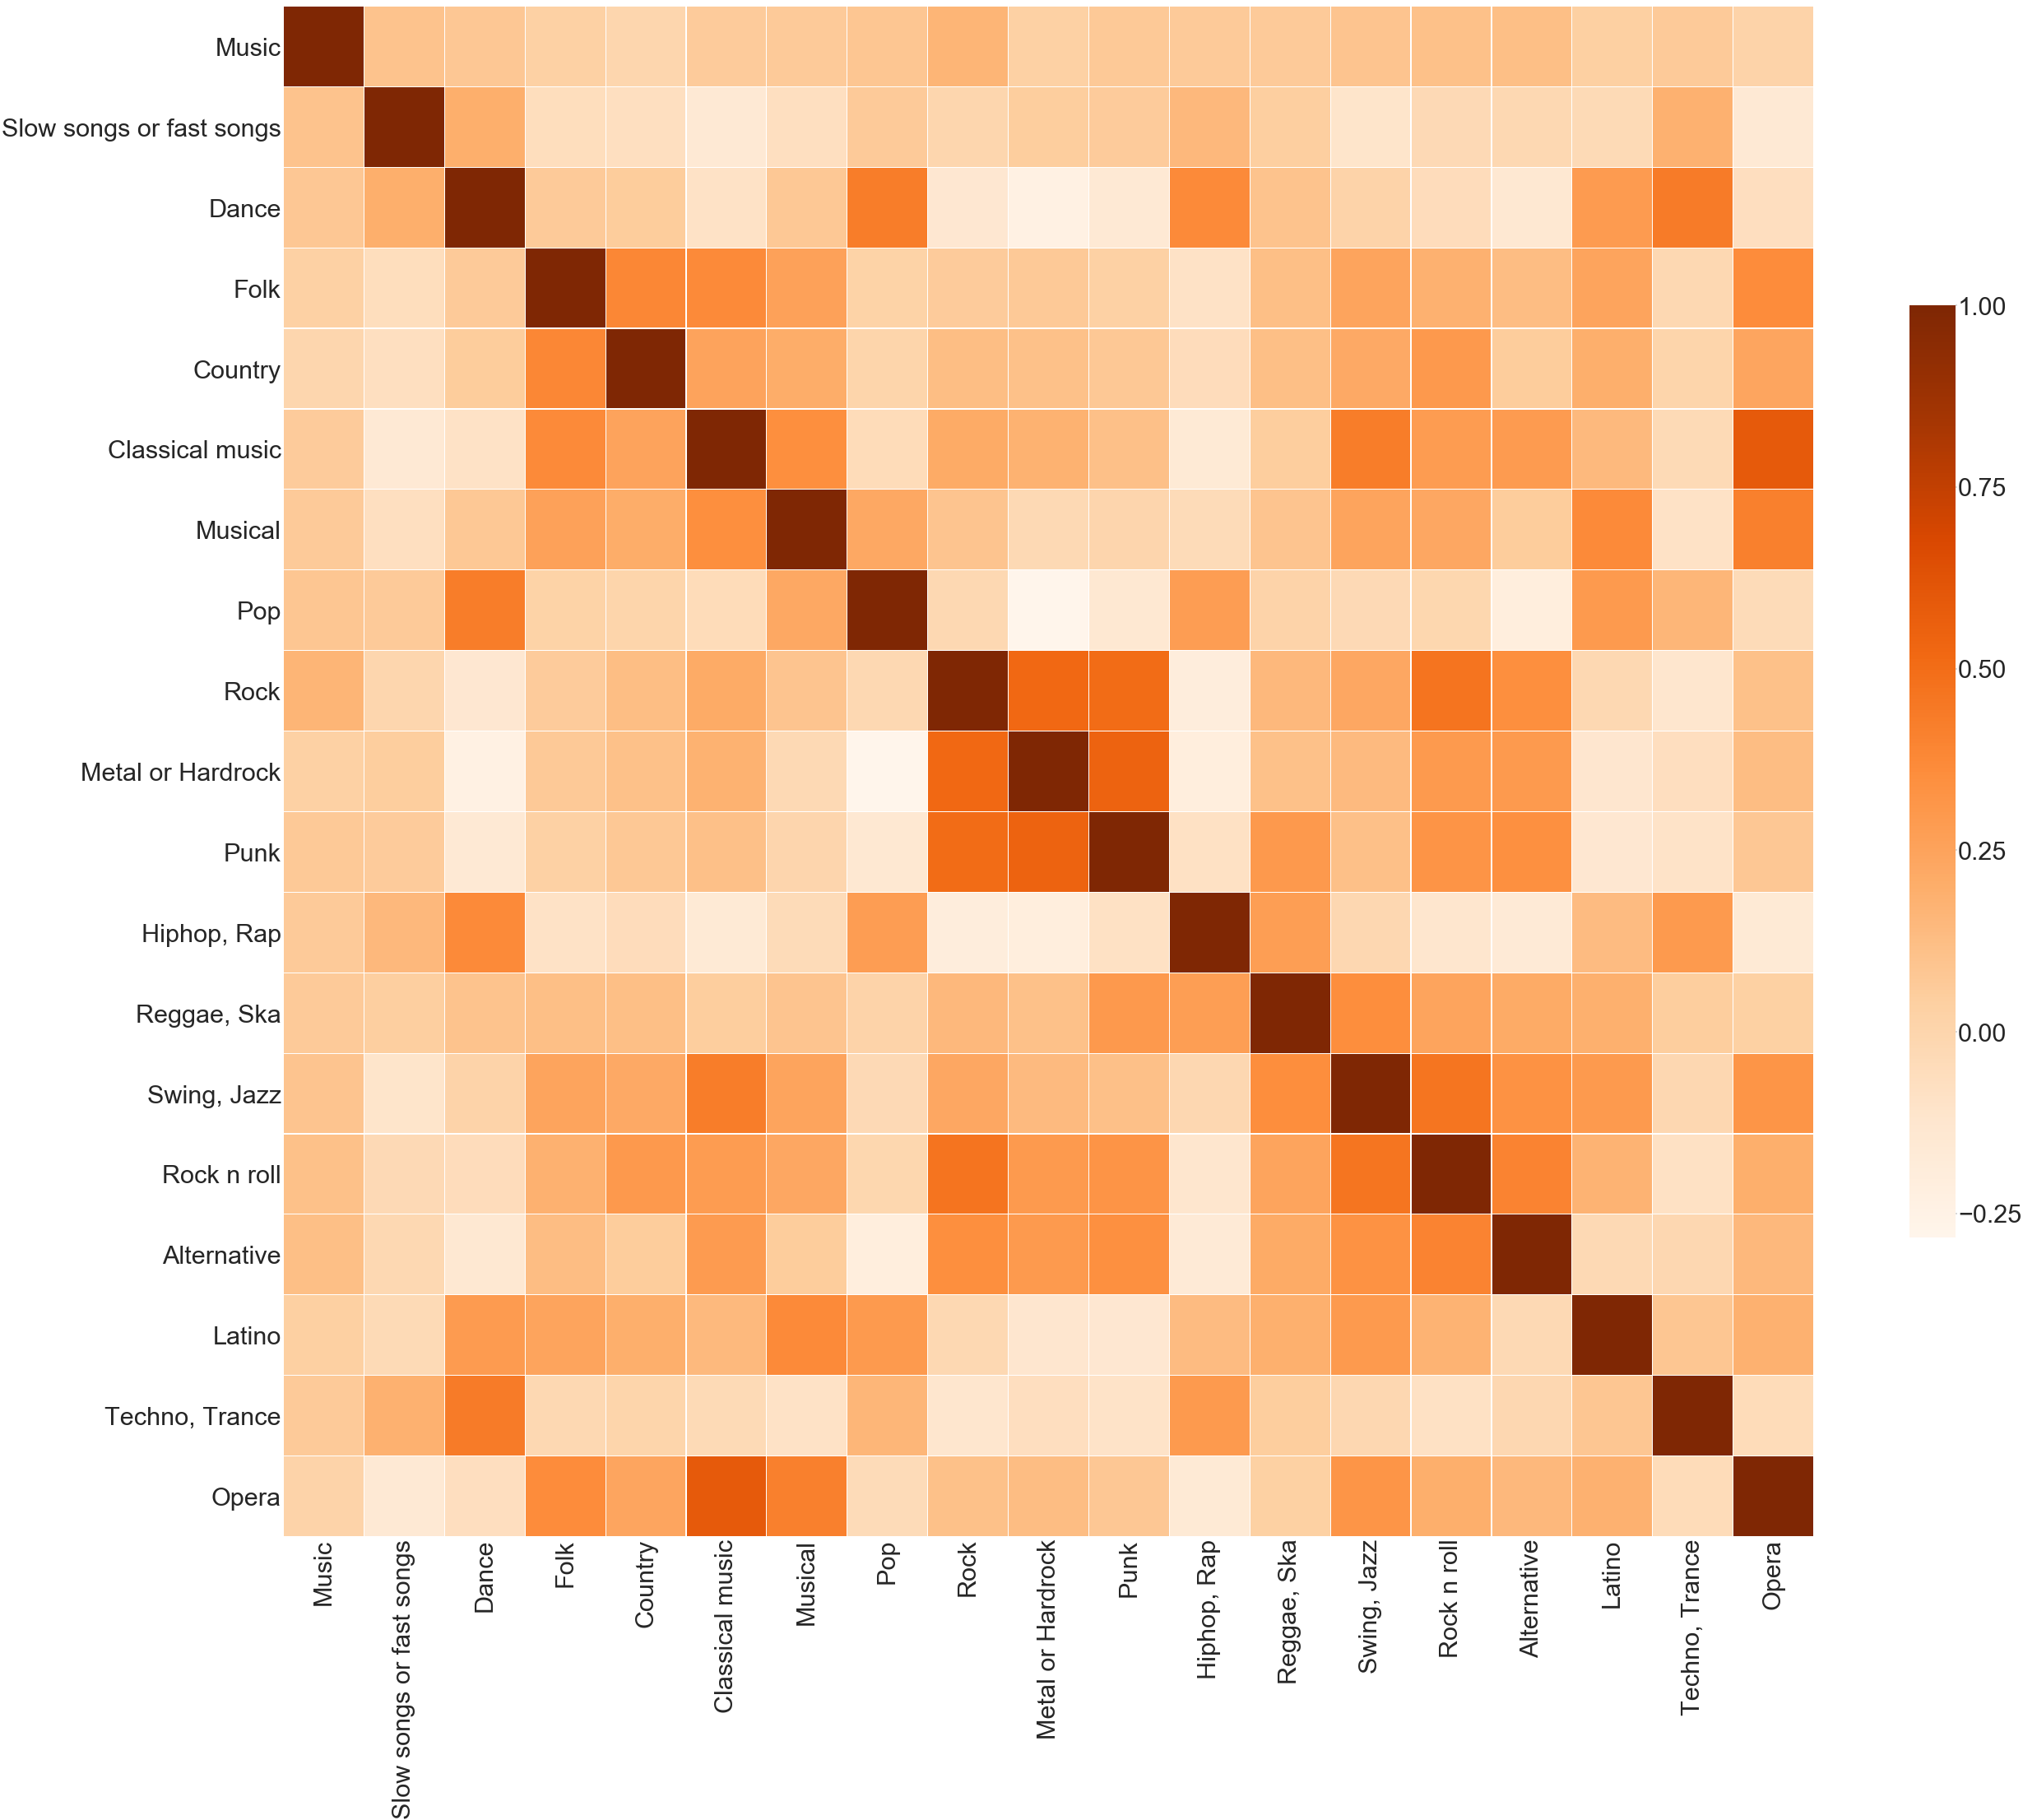

In [33]:
sns.heatmap(covarianceMusic,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [34]:
from sklearn.decomposition import PCA

n_components=9
p_list = ['pMusic'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(other)
otherPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.83933081 0.11183391 0.02820748 0.0053079  0.00388279 0.00374271
 0.0024426  0.00137416 0.00132672]


array([83.93, 95.11, 97.93, 98.46, 98.85, 99.22, 99.46, 99.6 , 99.73])

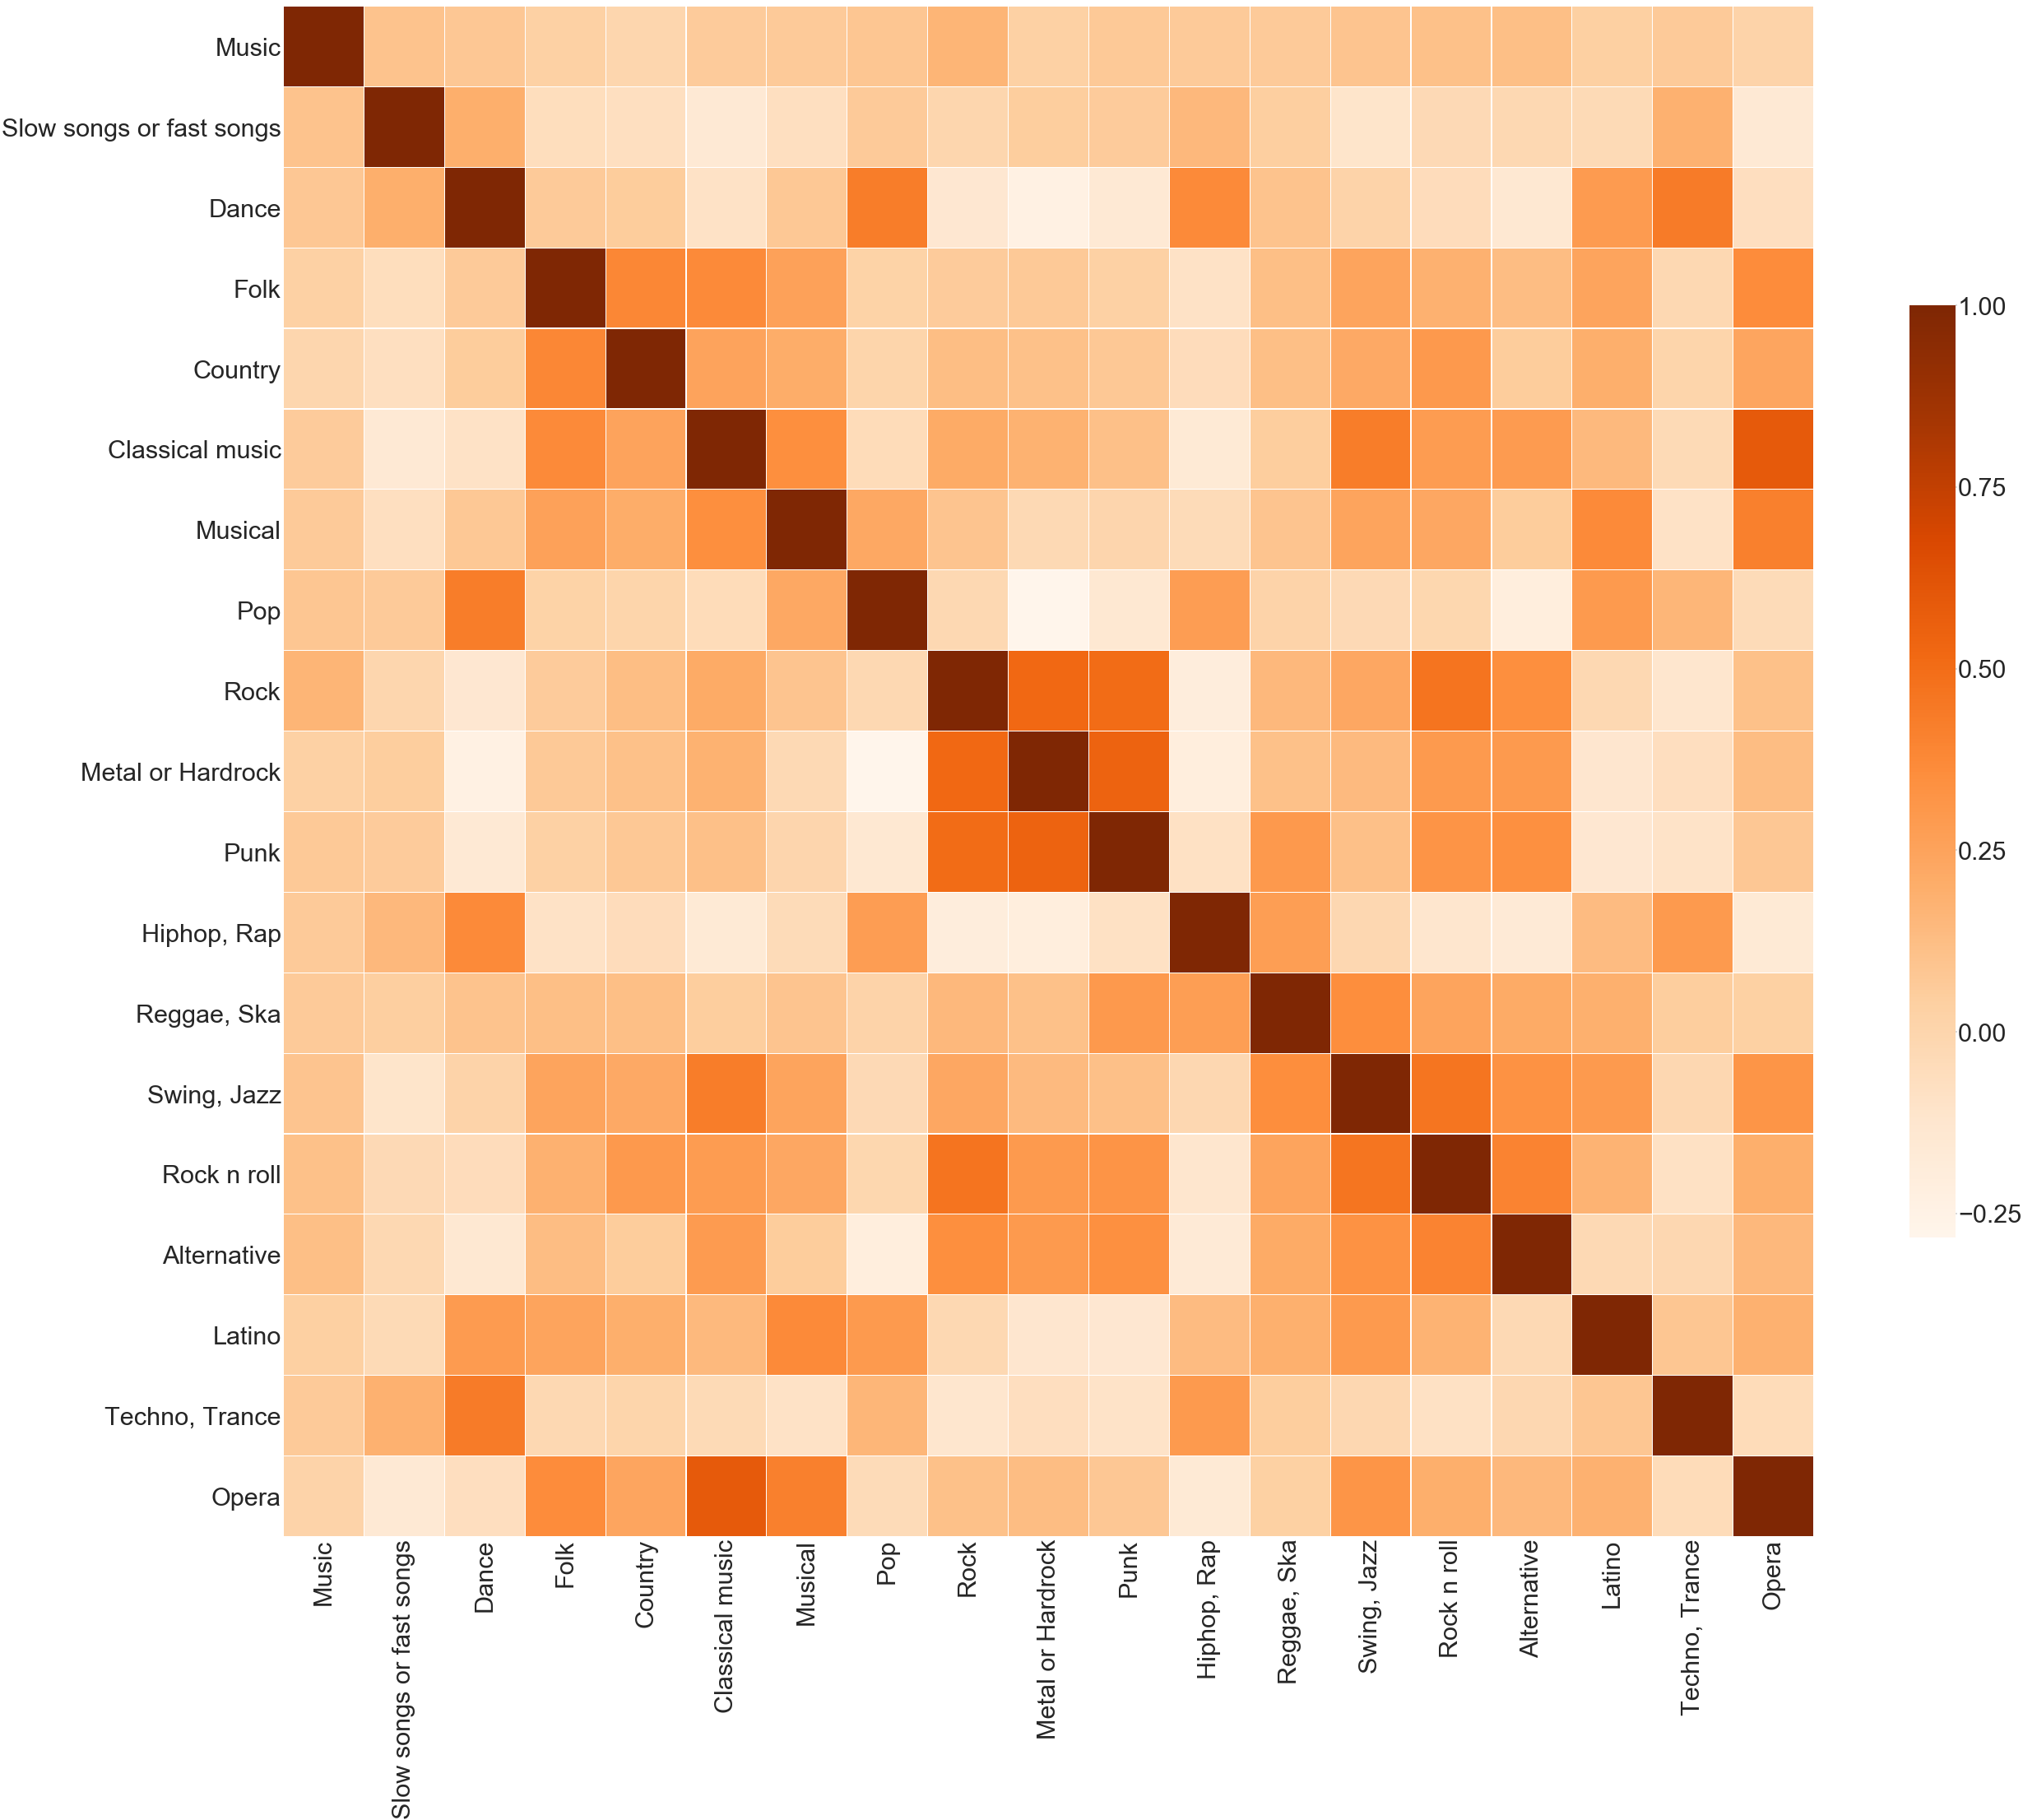

In [35]:
sns.heatmap(covarianceMusic,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [36]:
from sklearn.decomposition import PCA

n_components=12
p_list = ['pMusic'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(music)
musicPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.21498464 0.15151327 0.10642051 0.06328263 0.05967606 0.0514665
 0.04626728 0.0388451  0.03713314 0.03145875 0.0309062  0.02631129]


array([21.5 , 36.65, 47.29, 53.62, 59.59, 64.74, 69.37, 73.25, 76.96,
       80.11, 83.2 , 85.83])

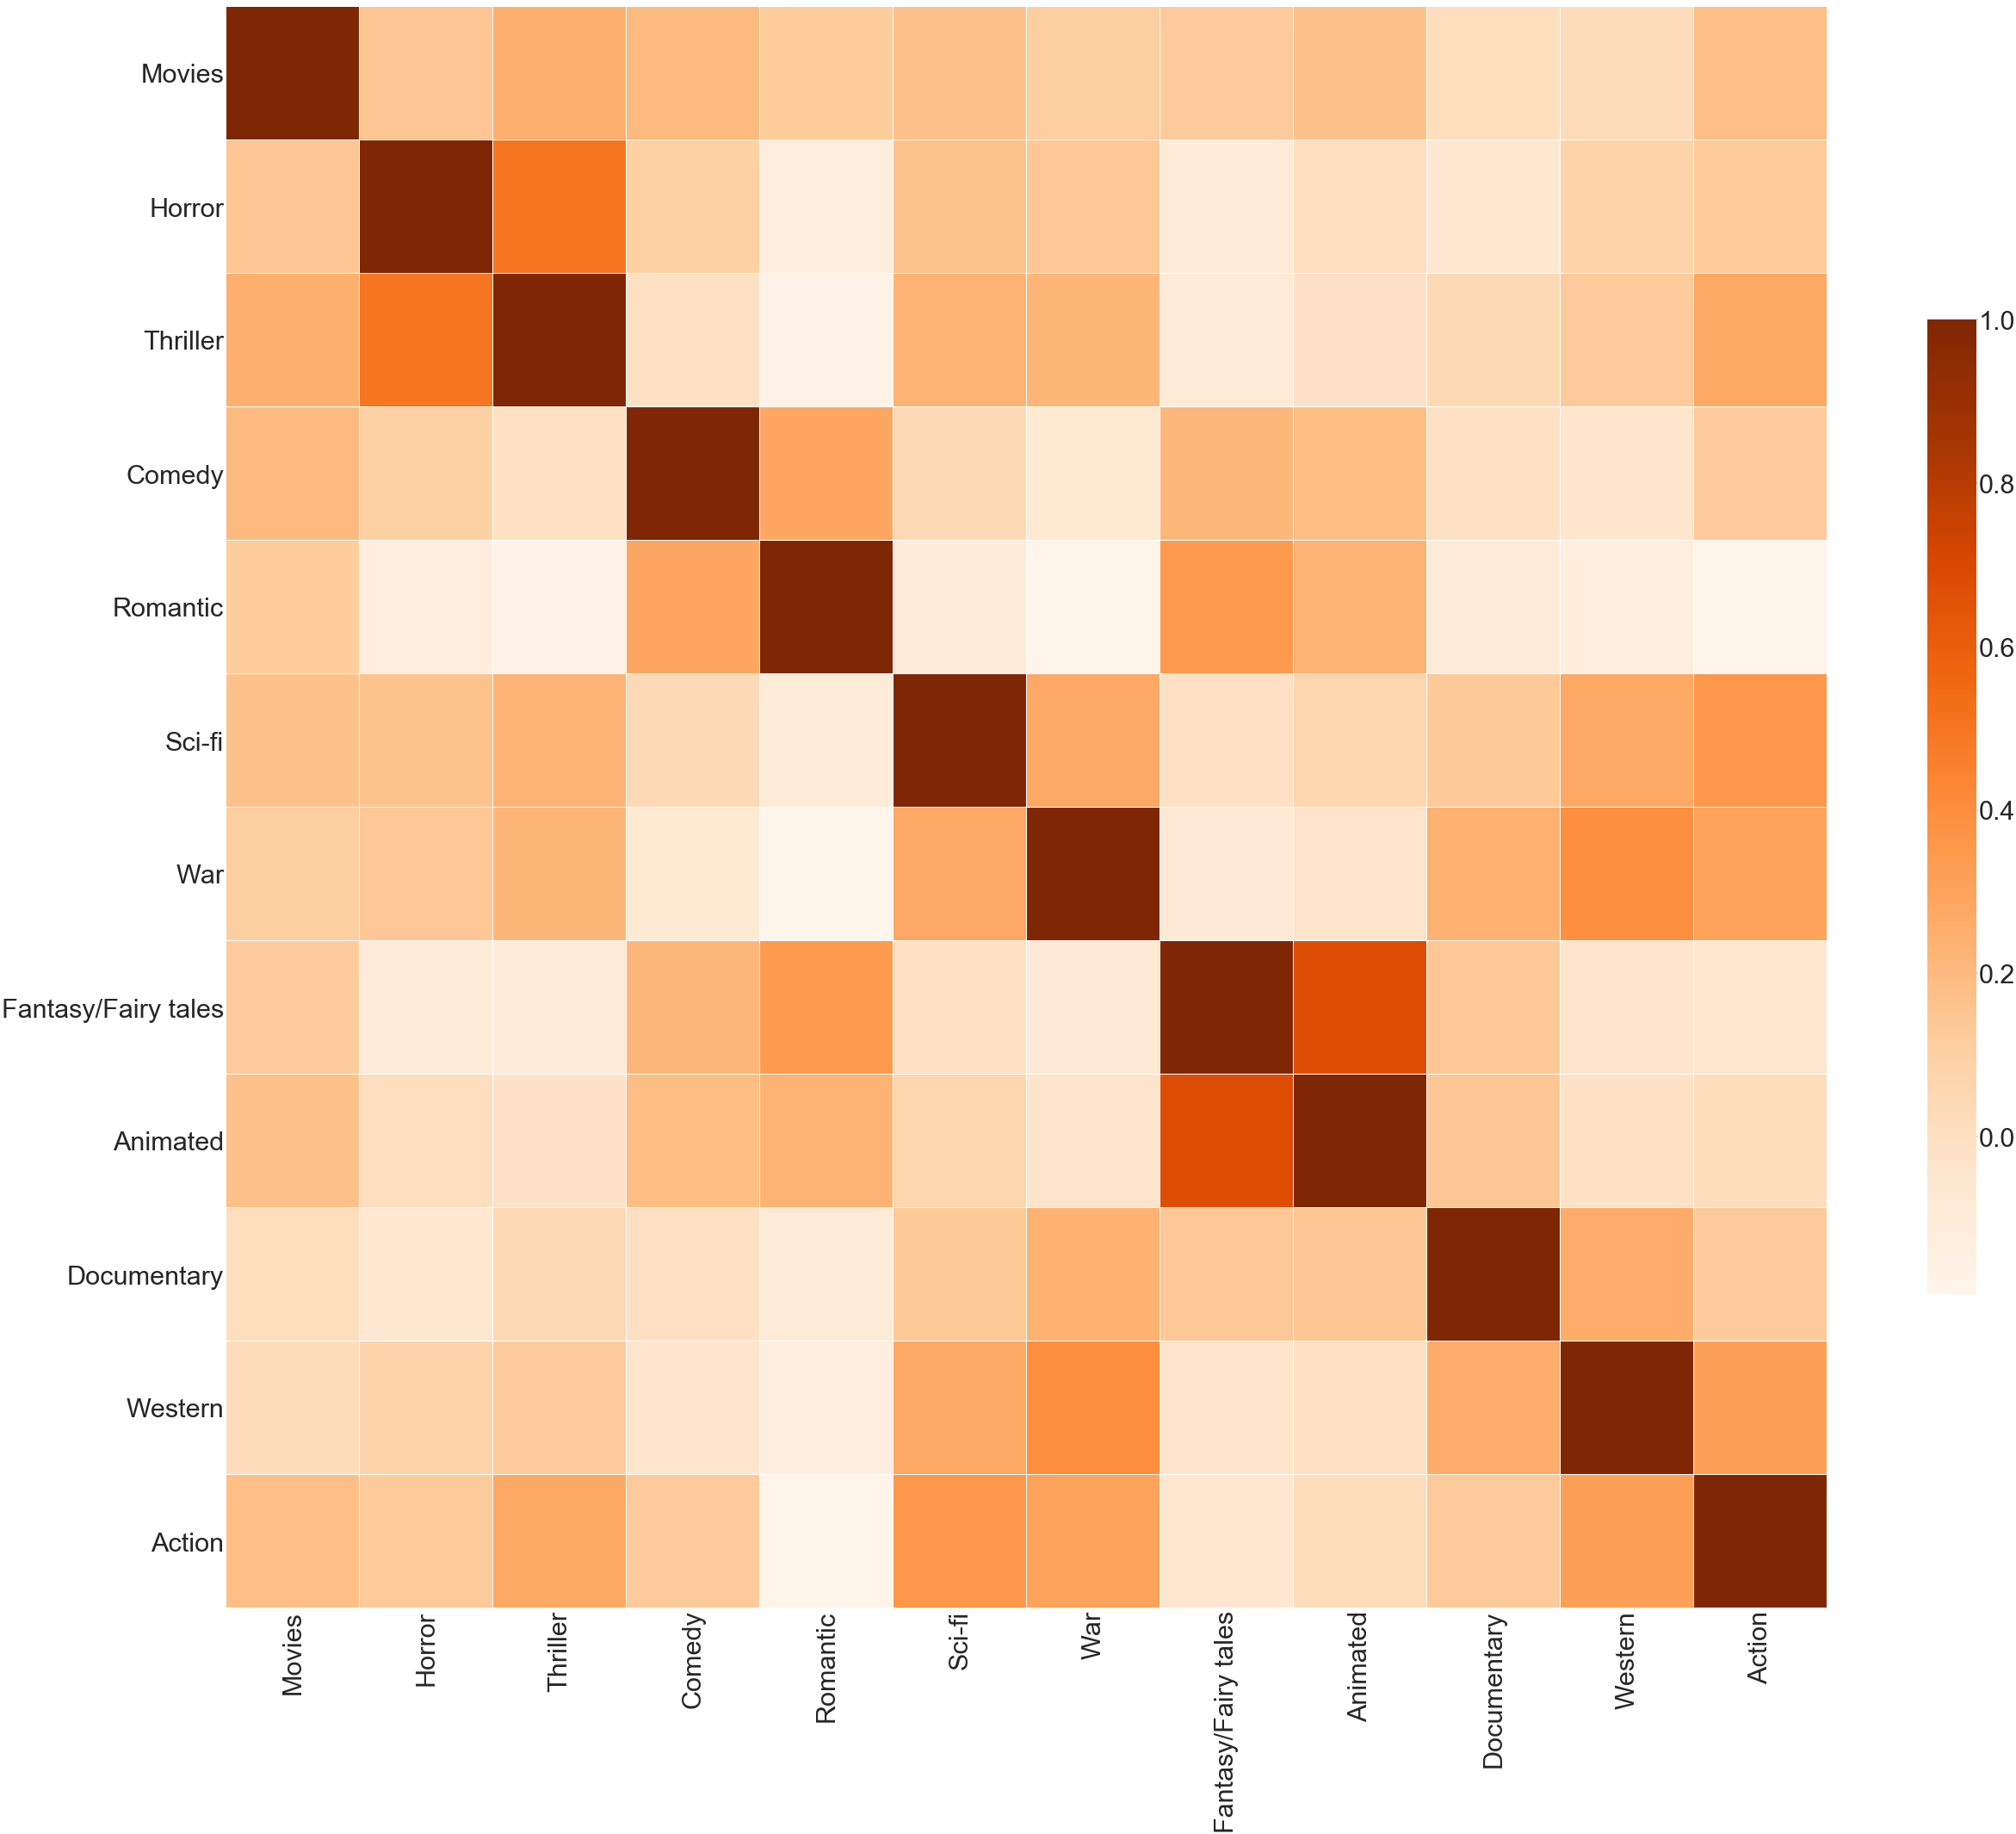

In [37]:
sns.heatmap(covarianceMovies,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [38]:
from sklearn.decomposition import PCA

n_components=8
p_list = ['pMovies'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(movies)
moviesPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.24124731 0.16890158 0.13451394 0.08409262 0.07147843 0.0639883
 0.05935488 0.05312608]


array([24.12, 41.01, 54.46, 62.87, 70.02, 76.42, 82.36, 87.67])

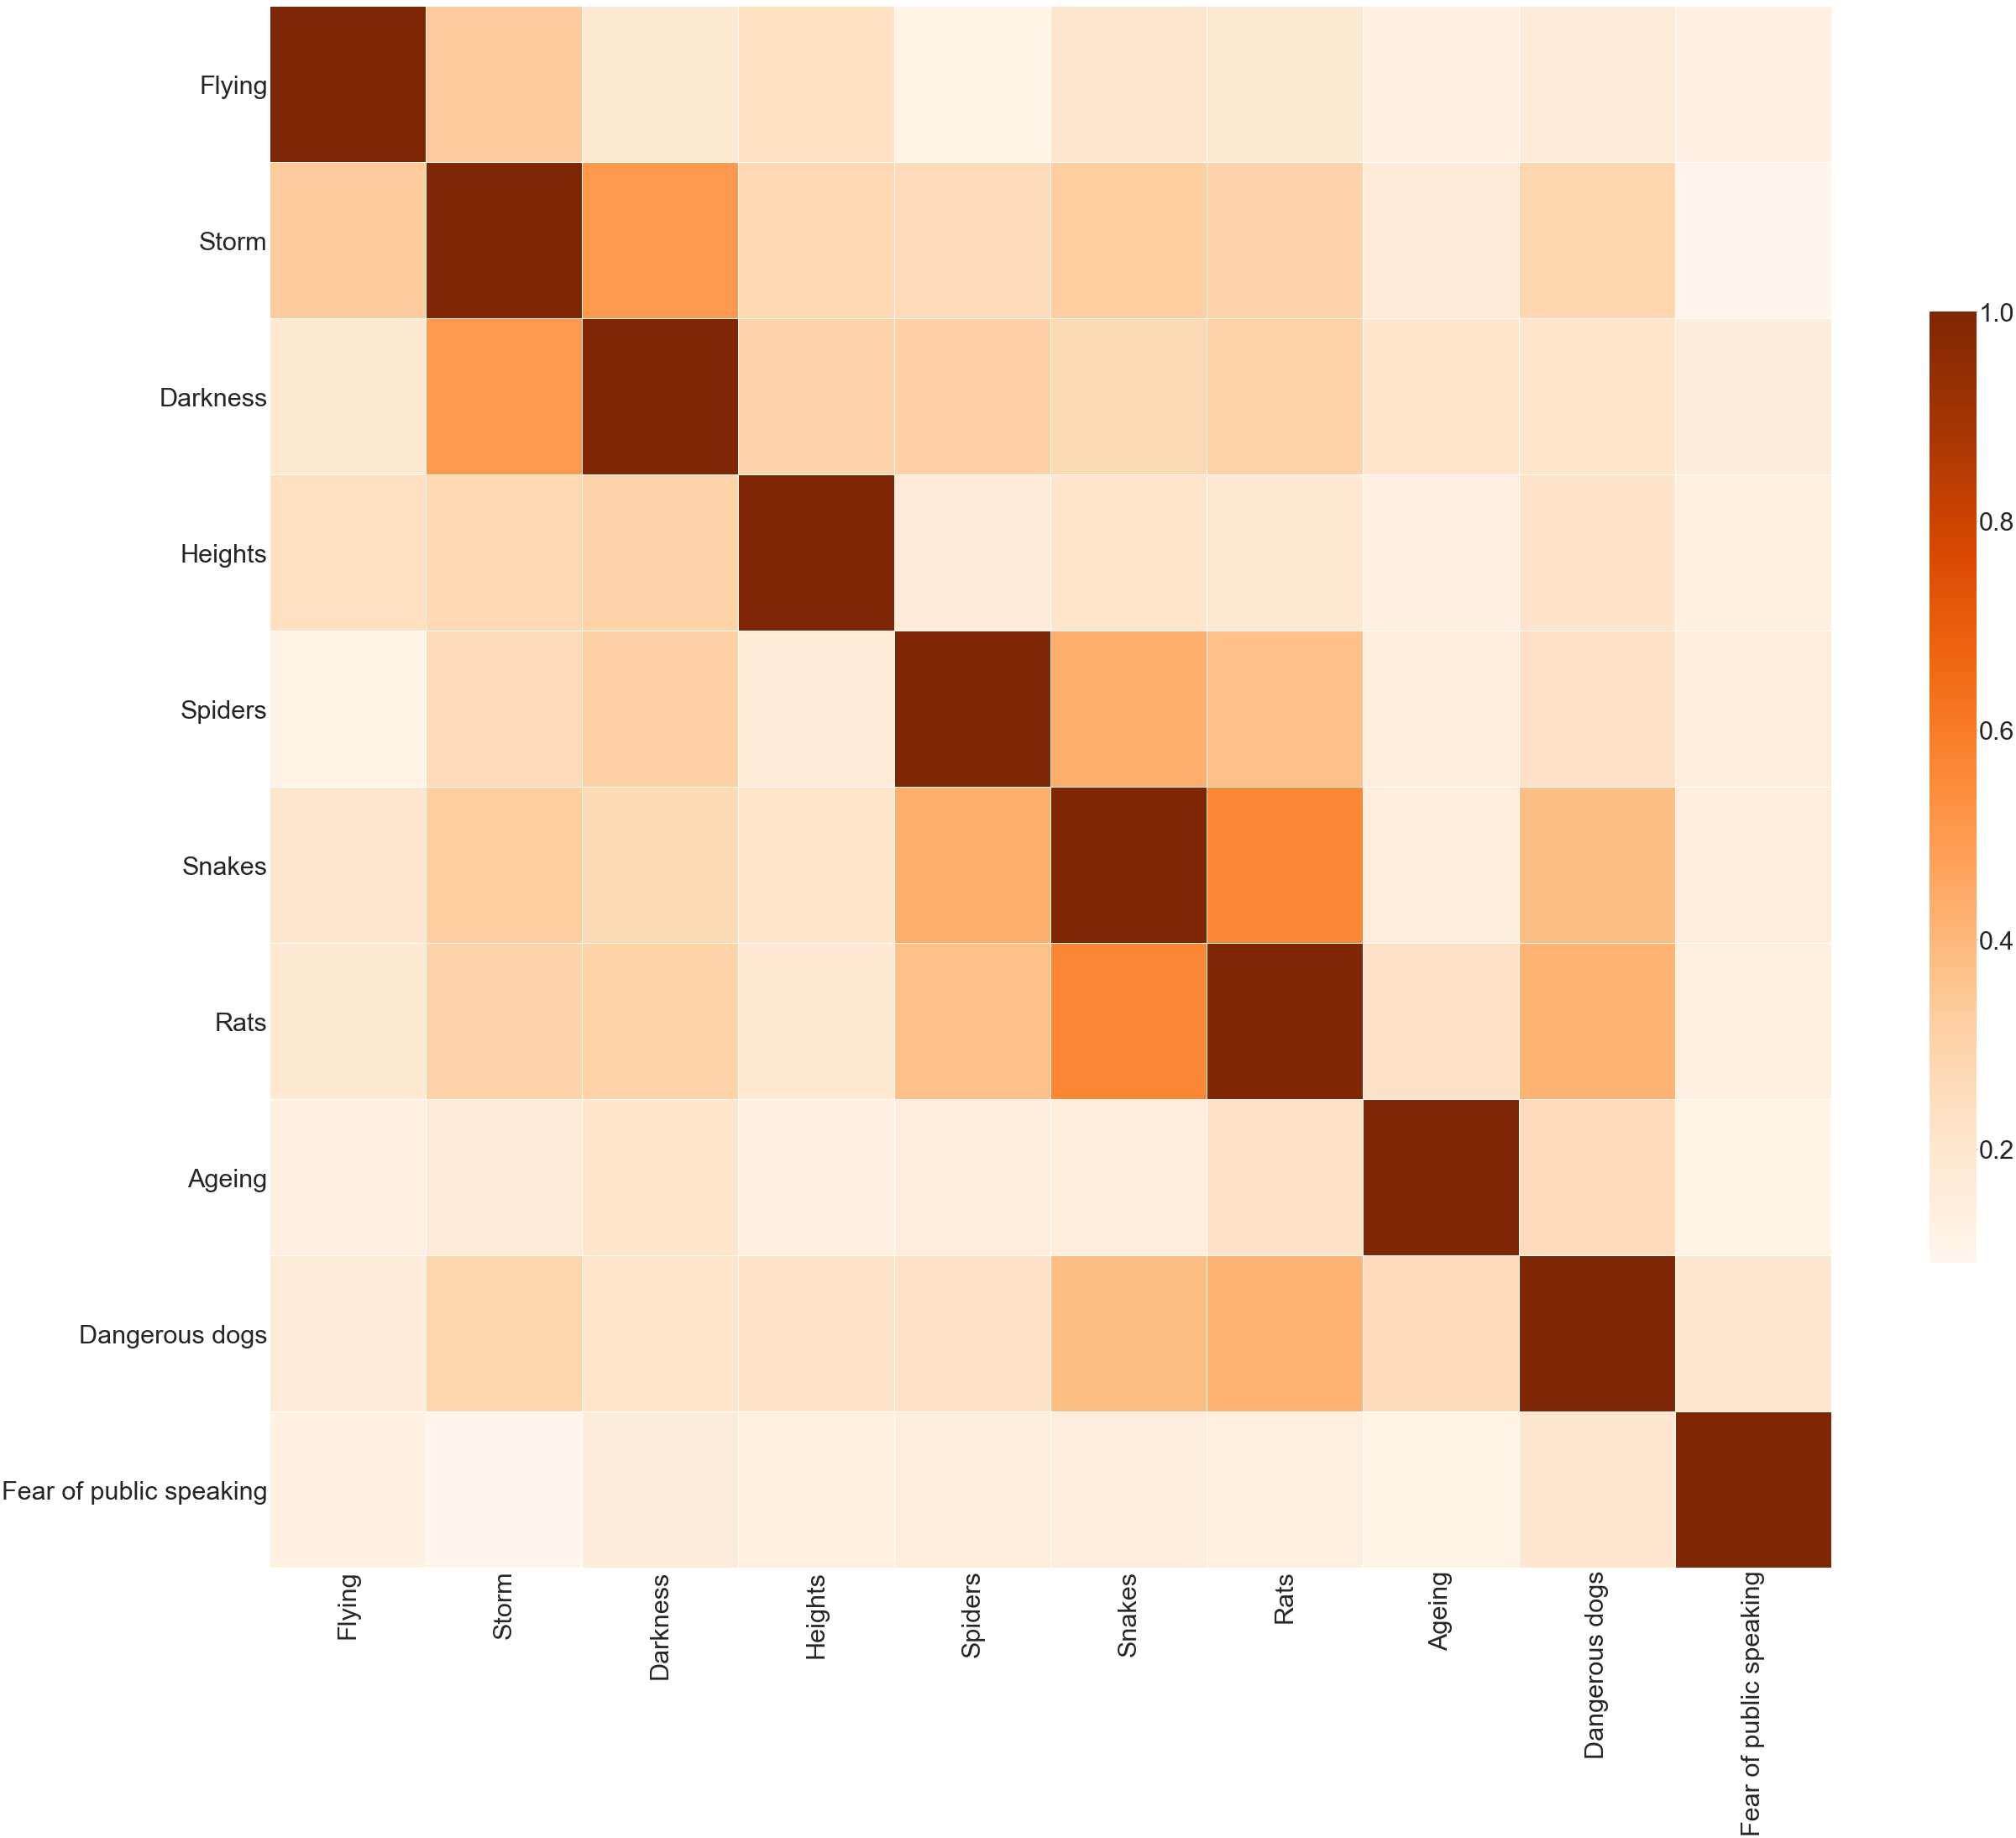

In [39]:
sns.heatmap(covarianceFears,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [40]:
from sklearn.decomposition import PCA

n_components=7
p_list = ['pFears'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(fears)
fearsPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.33863312 0.11298914 0.09904179 0.08990717 0.07910338 0.06817247
 0.0667475 ]


array([33.86, 45.16, 55.06, 64.05, 71.96, 78.78, 85.45])

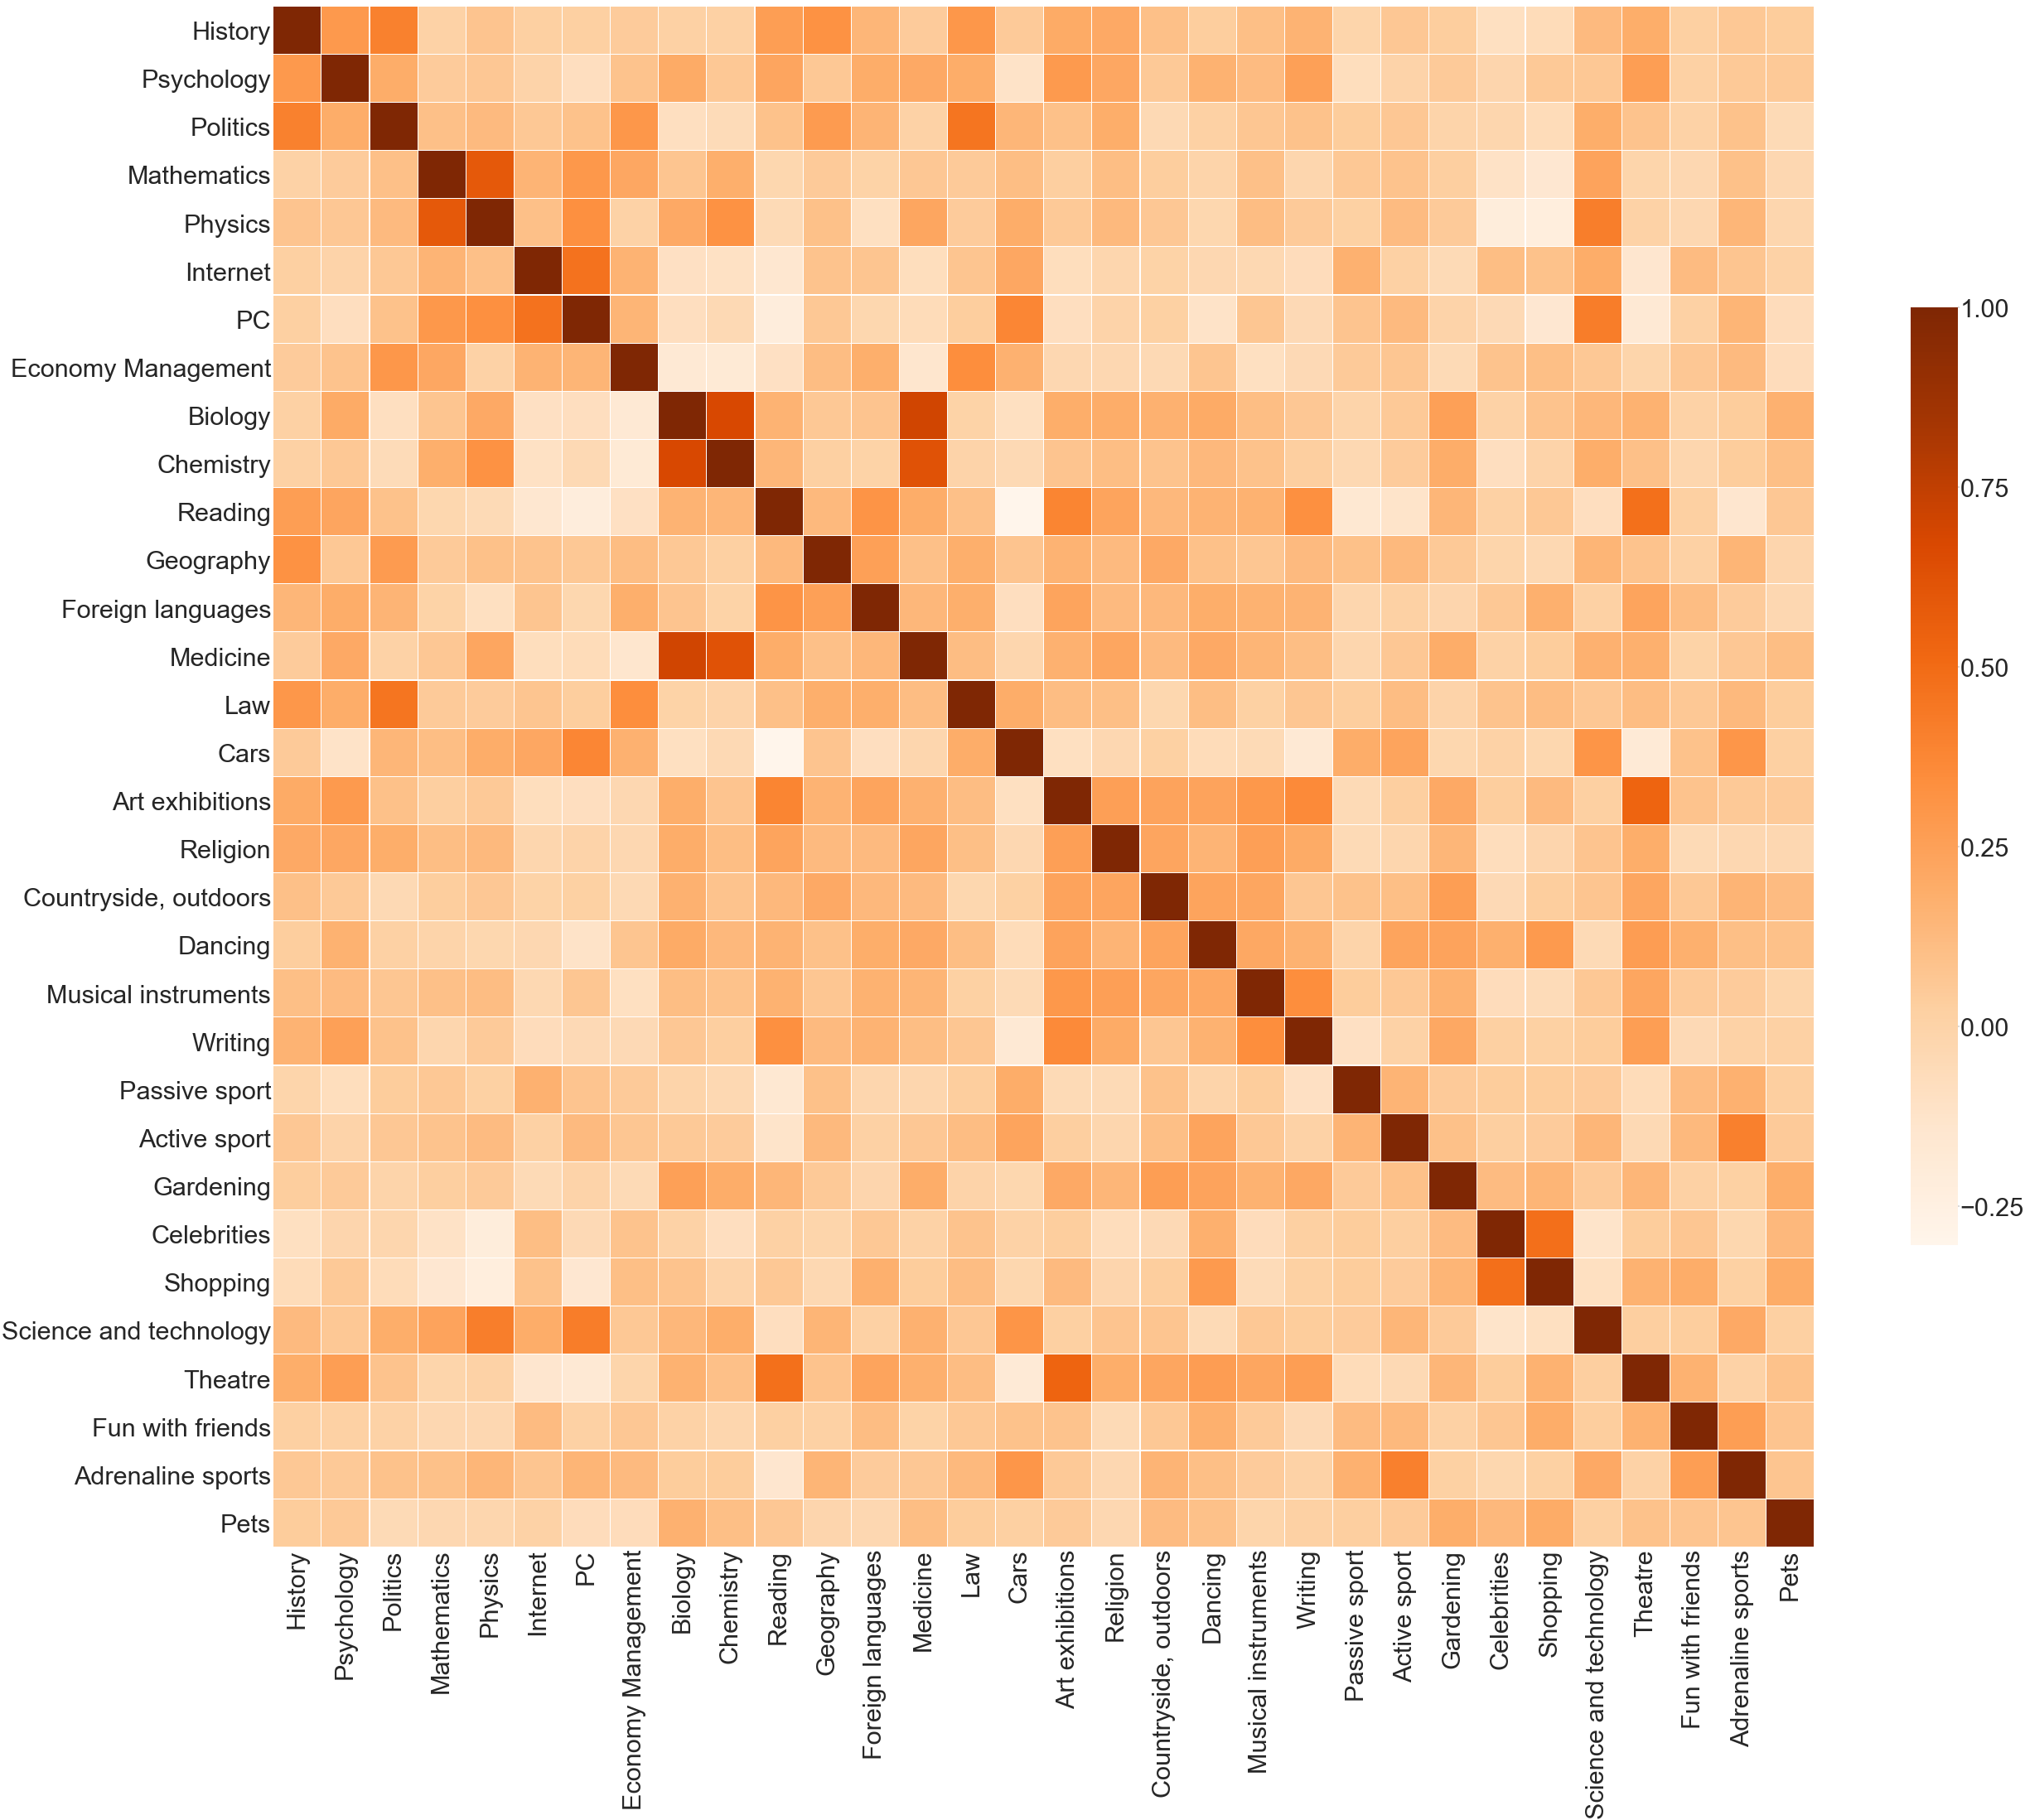

In [41]:
sns.heatmap(covarianceInterests,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [42]:
from sklearn.decomposition import PCA

n_components=20
p_list = ['pInterests'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(interests)
interestsPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.13686003 0.10343717 0.07971961 0.07008316 0.05149485 0.0422235
 0.04126892 0.0356798  0.03246748 0.0317597  0.02924685 0.02768542
 0.02620398 0.02497223 0.02303654 0.0222482  0.02097033 0.01951542
 0.01923332 0.01873514]


array([13.69, 24.03, 32.  , 39.01, 44.16, 48.38, 52.51, 56.08, 59.33,
       62.51, 65.43, 68.2 , 70.82, 73.32, 75.62, 77.84, 79.94, 81.89,
       83.81, 85.68])

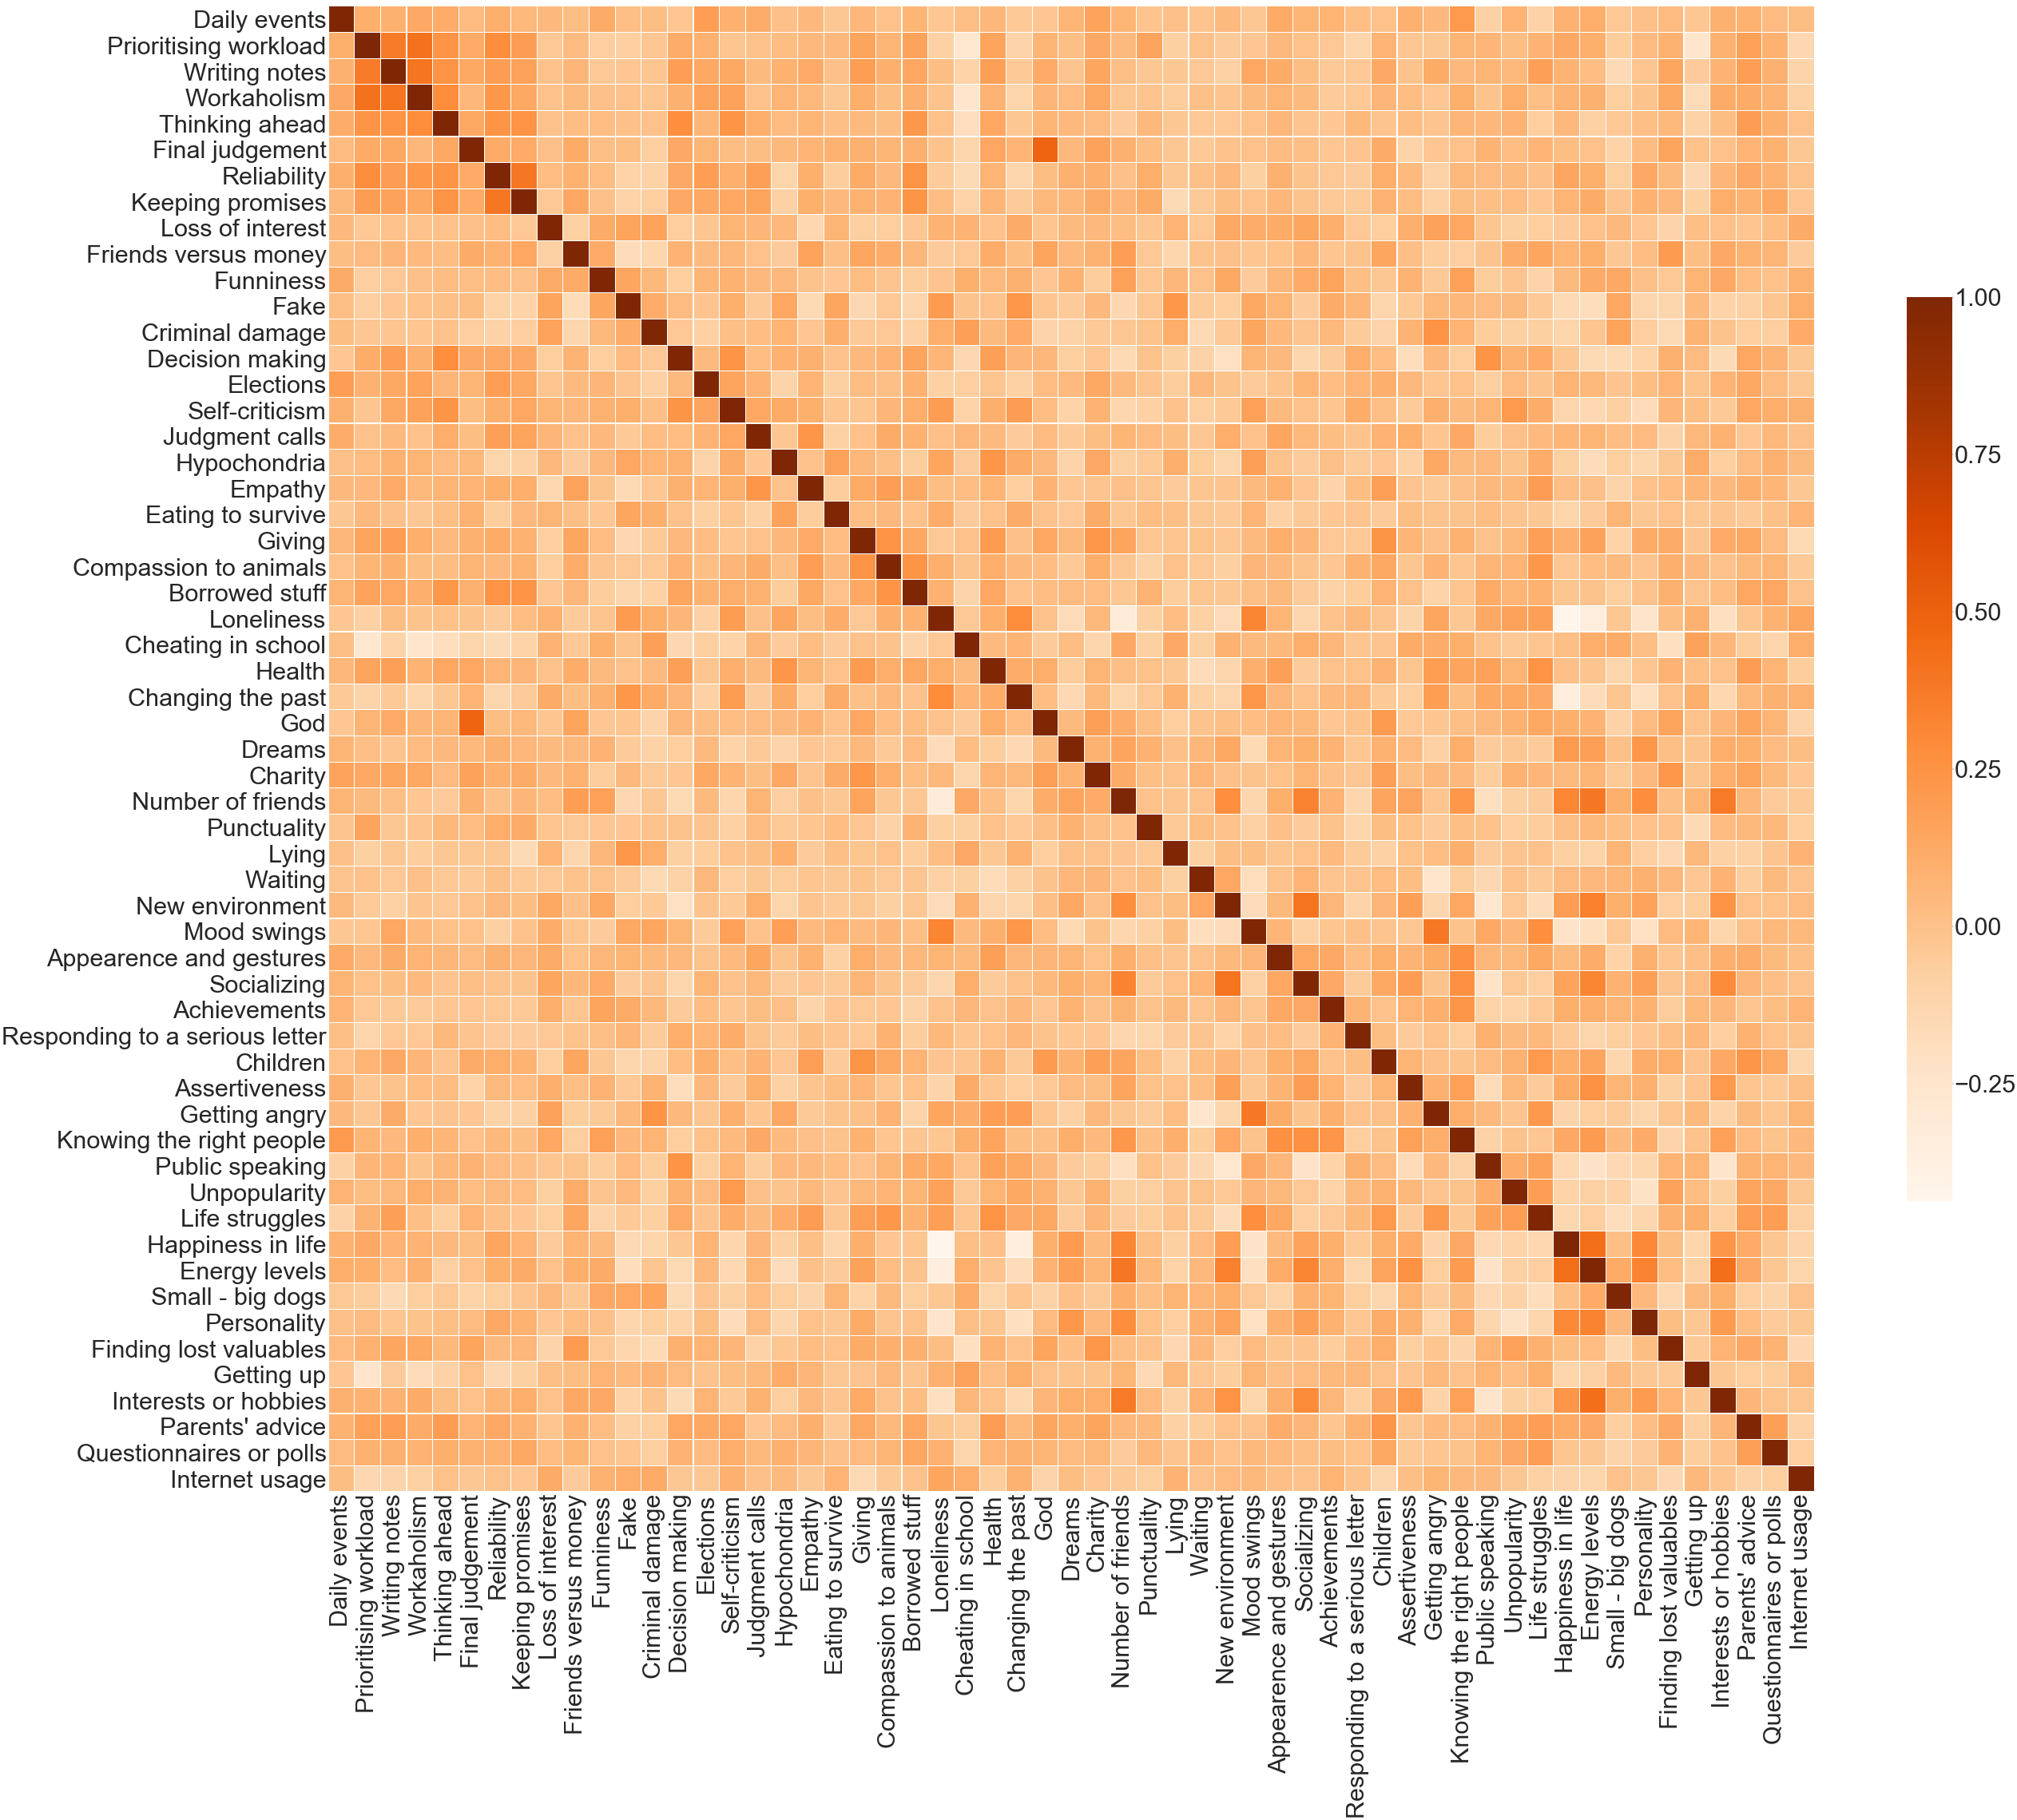

In [43]:
del personal['Empathy']
sns.heatmap(covariancePersonal,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [44]:
from sklearn.decomposition import PCA
n_components=37
p_list = ['pPersonal'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(personal)
personalPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.08211183 0.07324946 0.0523473  0.04607075 0.03702633 0.03667141
 0.02929769 0.02811842 0.02700806 0.02416141 0.02328364 0.02194894
 0.02127592 0.02016938 0.0199777  0.01962186 0.01871278 0.01829634
 0.01796812 0.01710953 0.01634116 0.01600447 0.01535063 0.0148086
 0.01438014 0.01415013 0.01388962 0.01336663 0.01309321 0.01291354
 0.01225121 0.01215893 0.0119293  0.01141509 0.01098664 0.01066157
 0.01063978]


array([ 8.21, 15.53, 20.76, 25.37, 29.07, 32.74, 35.67, 38.48, 41.18,
       43.6 , 45.93, 48.12, 50.25, 52.27, 54.27, 56.23, 58.1 , 59.93,
       61.73, 63.44, 65.07, 66.67, 68.21, 69.69, 71.13, 72.55, 73.94,
       75.28, 76.59, 77.88, 79.11, 80.33, 81.52, 82.66, 83.76, 84.83,
       85.89])

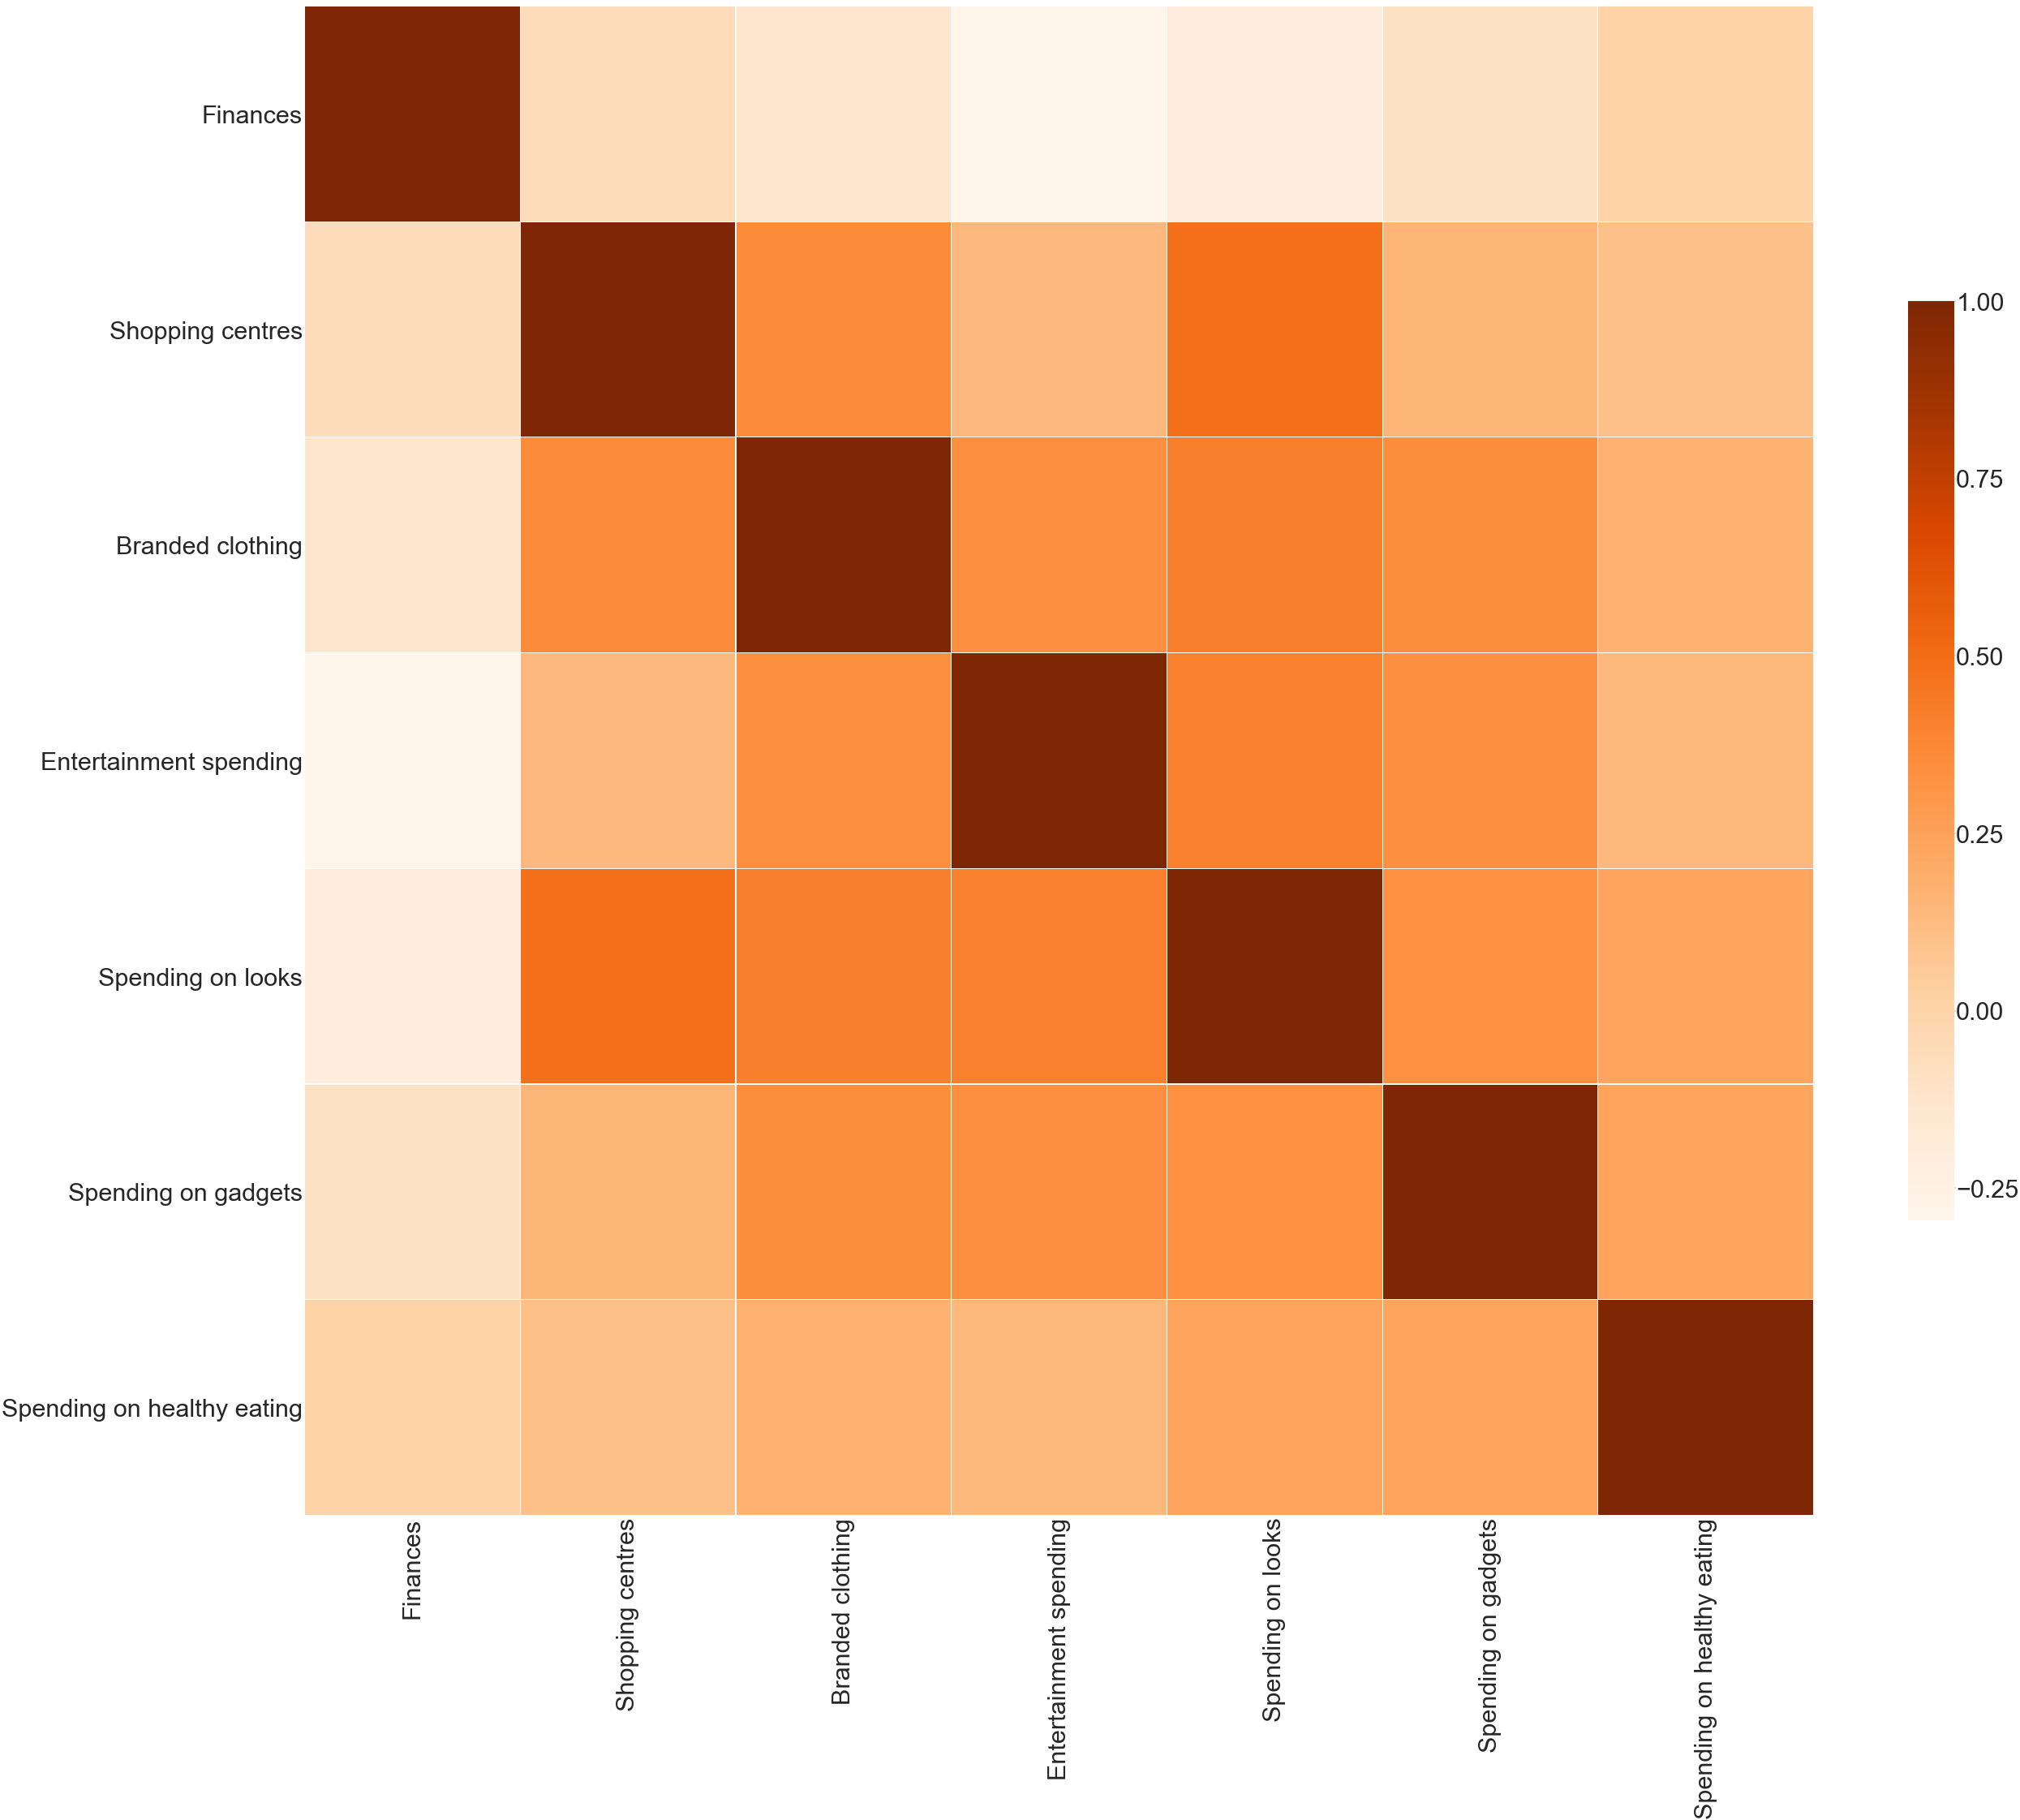

In [45]:
sns.heatmap(covarianceSpending,square=True, cmap="Oranges",linewidths=".5",cbar_kws={"shrink": .5})

In [46]:
from sklearn.decomposition import PCA

n_components=4
p_list = ['pSpending'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(spending)
spendingPCADf = pd.DataFrame(data = principalComponents, columns = p_list)
print(pca.explained_variance_ratio_)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

[0.37546582 0.15532969 0.13341754 0.10168878]


array([37.55, 53.08, 66.42, 76.59])

In [47]:
other.shape

(1007, 14)

We can now merge the different PCA datasets and train the algorithms on this new dataset

In [48]:
dfPCAs = pd.concat([musicPCADf,moviesPCADf,fearsPCADf,interestsPCADf,personalPCADf,spendingPCADf,otherPCADf],axis=1,sort=False)
dfPCAs.shape

(1007, 97)

In [49]:
dfPCAs.isnull().values.any()

False

This way we have reduced the dimension of the dataset from 150 to 101 columns, let's see how this impact performances

In [50]:
from sklearn.model_selection import train_test_split
X_trainPCAs, X_testPCAs, y_trainPCAs, y_testPCAs = train_test_split(dfPCAs, y, test_size=0.2,random_state = 67)
print(X_trainPCAs.shape, y_trainPCAs.shape)
print(X_testPCAs.shape, y_testPCAs.shape)

(805, 97) (805,)
(202, 97) (202,)


## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=29)  
classifier.fit(X_trainPCAs, y_trainPCAs)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

In [52]:
y_pred = classifier.predict(X_testPCAs) 
classifier.score(X_testPCAs,y_testPCAs)

0.6732673267326733

## Random Forests

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
for n in [50,100,150,200]:
    for d in range(1,20):
        
        clf = RandomForestClassifier(n_estimators=n, max_depth=d,
                             random_state=0)
        scores = cross_val_score(clf, dfPCAs, y, cv=10)
        print(str(np.mean(scores))+", depth= "+str(d)+", n_estim= "+str(n))


0.6623564356435644, depth= 1, n_estim= 50
0.6623564356435644, depth= 2, n_estim= 50
0.6613663366336635, depth= 3, n_estim= 50


KeyboardInterrupt: 

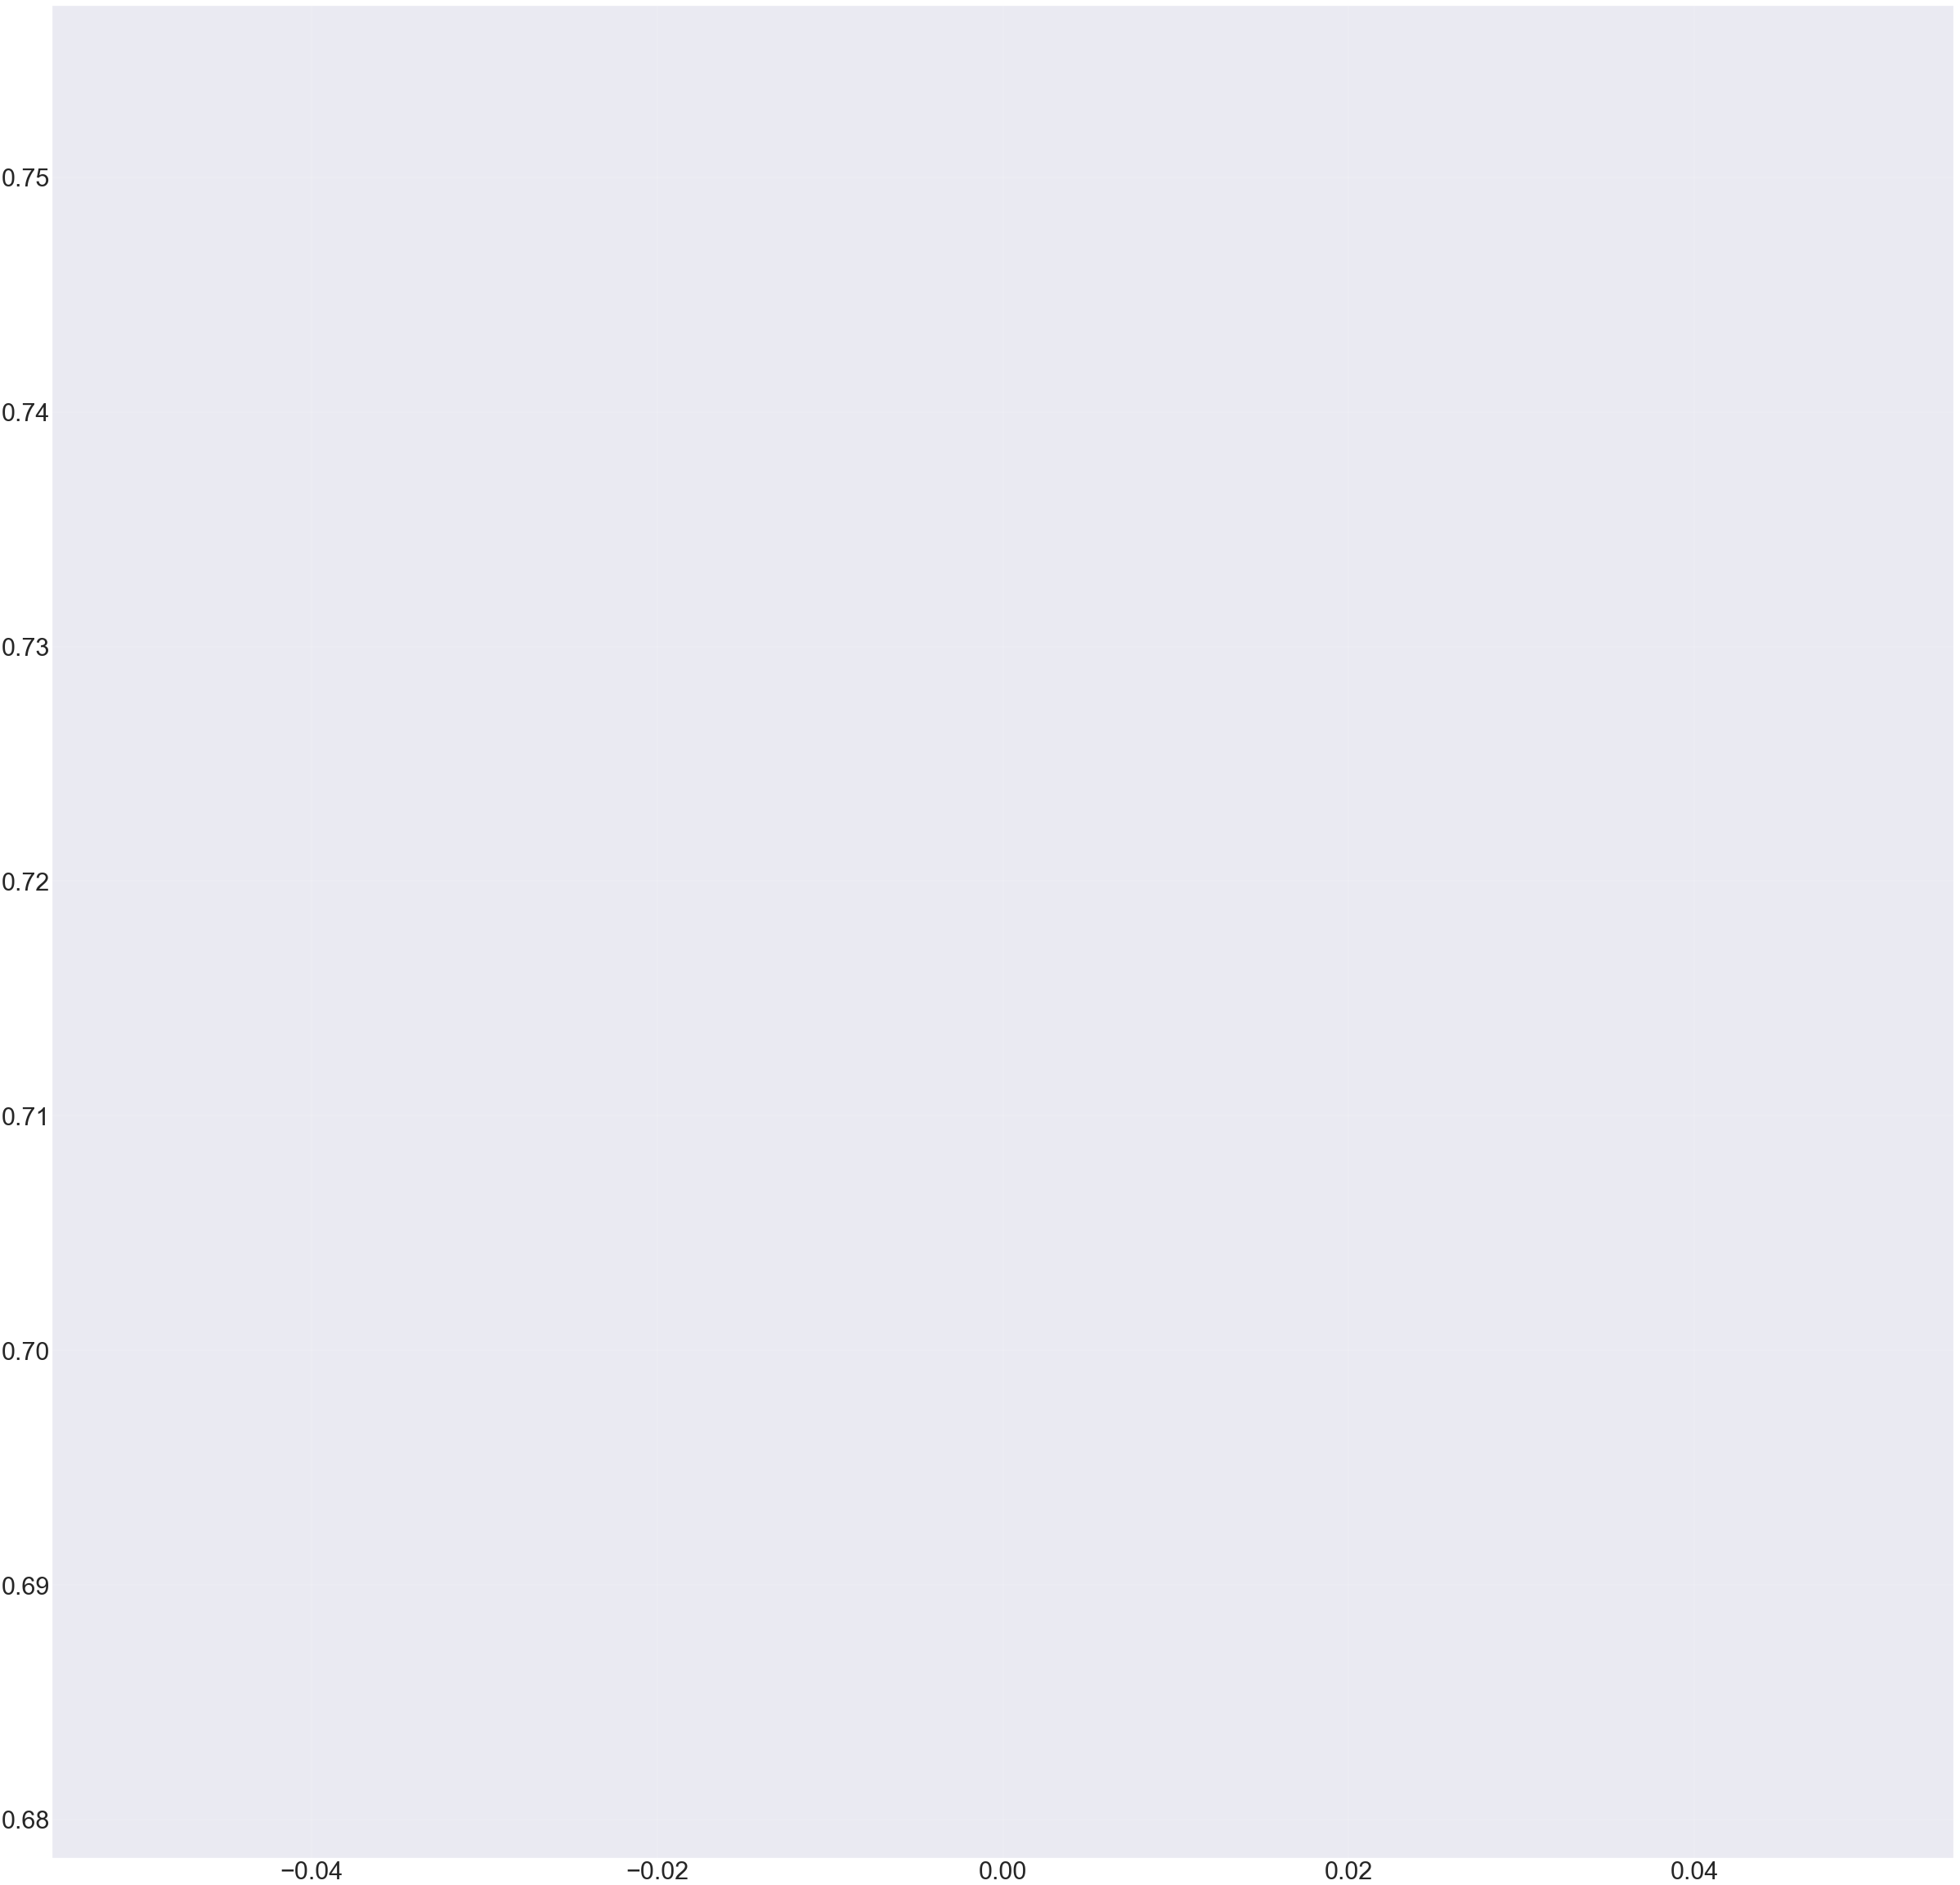

In [70]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=150, max_depth=17,
                             random_state=0)
clf.fit(X_trainPCAs, y_trainPCAs)
clf.score(X_testPCAs,y_testPCAs)

## Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X_trainPCAs, y_trainPCAs)
print(bdt.score(X_testPCAs,y_testPCAs))
scores = cross_val_score(bdt,dfPCAs,y,cv=10)
scores

0.7178217821782178


array([0.69306931, 0.64356436, 0.67326733, 0.67326733, 0.68316832,
       0.66336634, 0.67326733, 0.68      , 0.69      , 0.69      ])

In [56]:
summ=0.0
for i in scores:
    summ+=i
average = summ /len(scores)
average

0.6762970297029701

## RIDGE 

In [57]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=10).fit(X_trainPCAs, y_trainPCAs)
clf.score(X_testPCAs, y_testPCAs) 

0.6881188118811881

What we got, out of this different processing using PCA on each feature subset, is that regardless to the algorithm, the accuracy is not that good, 
in fact is almost always below 70%, and our baseline is 66%. 
Honestly, I can say that the reason could be that since we don't know which feature is more related to our target variable, but we have just plotted 
the correlation among all the features but Empathy, we are doing something conceptually wrong. 
In fact, let's assume that the subset Music is strongly correlated with Empathy, we are reducing its variance. 
Moreover, reading online, I understood that pearson correlation is not the bast correlation algorithm when you are dealing with categorical variables, 
An alternative approach can be performing PCA on the whole dataset

In [58]:
del dataset['Empathy']
dataset.shape

(1007, 149)

In [59]:
from sklearn.decomposition import PCA

n_components=70
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

In [60]:
pca.explained_variance_ratio_

array([0.49518322, 0.06618858, 0.02682683, 0.02193949, 0.01991998,
       0.01763351, 0.0127984 , 0.01137629, 0.01015419, 0.00926592,
       0.00828005, 0.00757979, 0.00729838, 0.00685369, 0.0066985 ,
       0.00642732, 0.00594168, 0.00571739, 0.00536348, 0.00518394,
       0.00508071, 0.00482047, 0.00479795, 0.00463675, 0.00452775,
       0.0043869 , 0.00414554, 0.00401913, 0.00391   , 0.00387014,
       0.00380778, 0.00376563, 0.00365537, 0.00363667, 0.00349101,
       0.00340093, 0.00339064, 0.00327488, 0.00324181, 0.00314928,
       0.00310738, 0.00306318, 0.00303887, 0.00297355, 0.00294194,
       0.0028854 , 0.00283006, 0.00278273, 0.00277535, 0.00269887,
       0.0026857 , 0.00262727, 0.00255474, 0.00254137, 0.00251131,
       0.00248141, 0.0024411 , 0.00240716, 0.00236457, 0.00223881,
       0.00223194, 0.00218493, 0.00216012, 0.00214029, 0.00209324,
       0.00206494, 0.00201292, 0.00201015, 0.00199474, 0.00195622])

In [61]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([49.52, 56.14, 58.82, 61.01, 63.  , 64.76, 66.04, 67.18, 68.2 ,
       69.13, 69.96, 70.72, 71.45, 72.14, 72.81, 73.45, 74.04, 74.61,
       75.15, 75.67, 76.18, 76.66, 77.14, 77.6 , 78.05, 78.49, 78.9 ,
       79.3 , 79.69, 80.08, 80.46, 80.84, 81.21, 81.57, 81.92, 82.26,
       82.6 , 82.93, 83.25, 83.56, 83.87, 84.18, 84.48, 84.78, 85.07,
       85.36, 85.64, 85.92, 86.2 , 86.47, 86.74, 87.  , 87.26, 87.51,
       87.76, 88.01, 88.25, 88.49, 88.73, 88.95, 89.17, 89.39, 89.61,
       89.82, 90.03, 90.24, 90.44, 90.64, 90.84, 91.04])

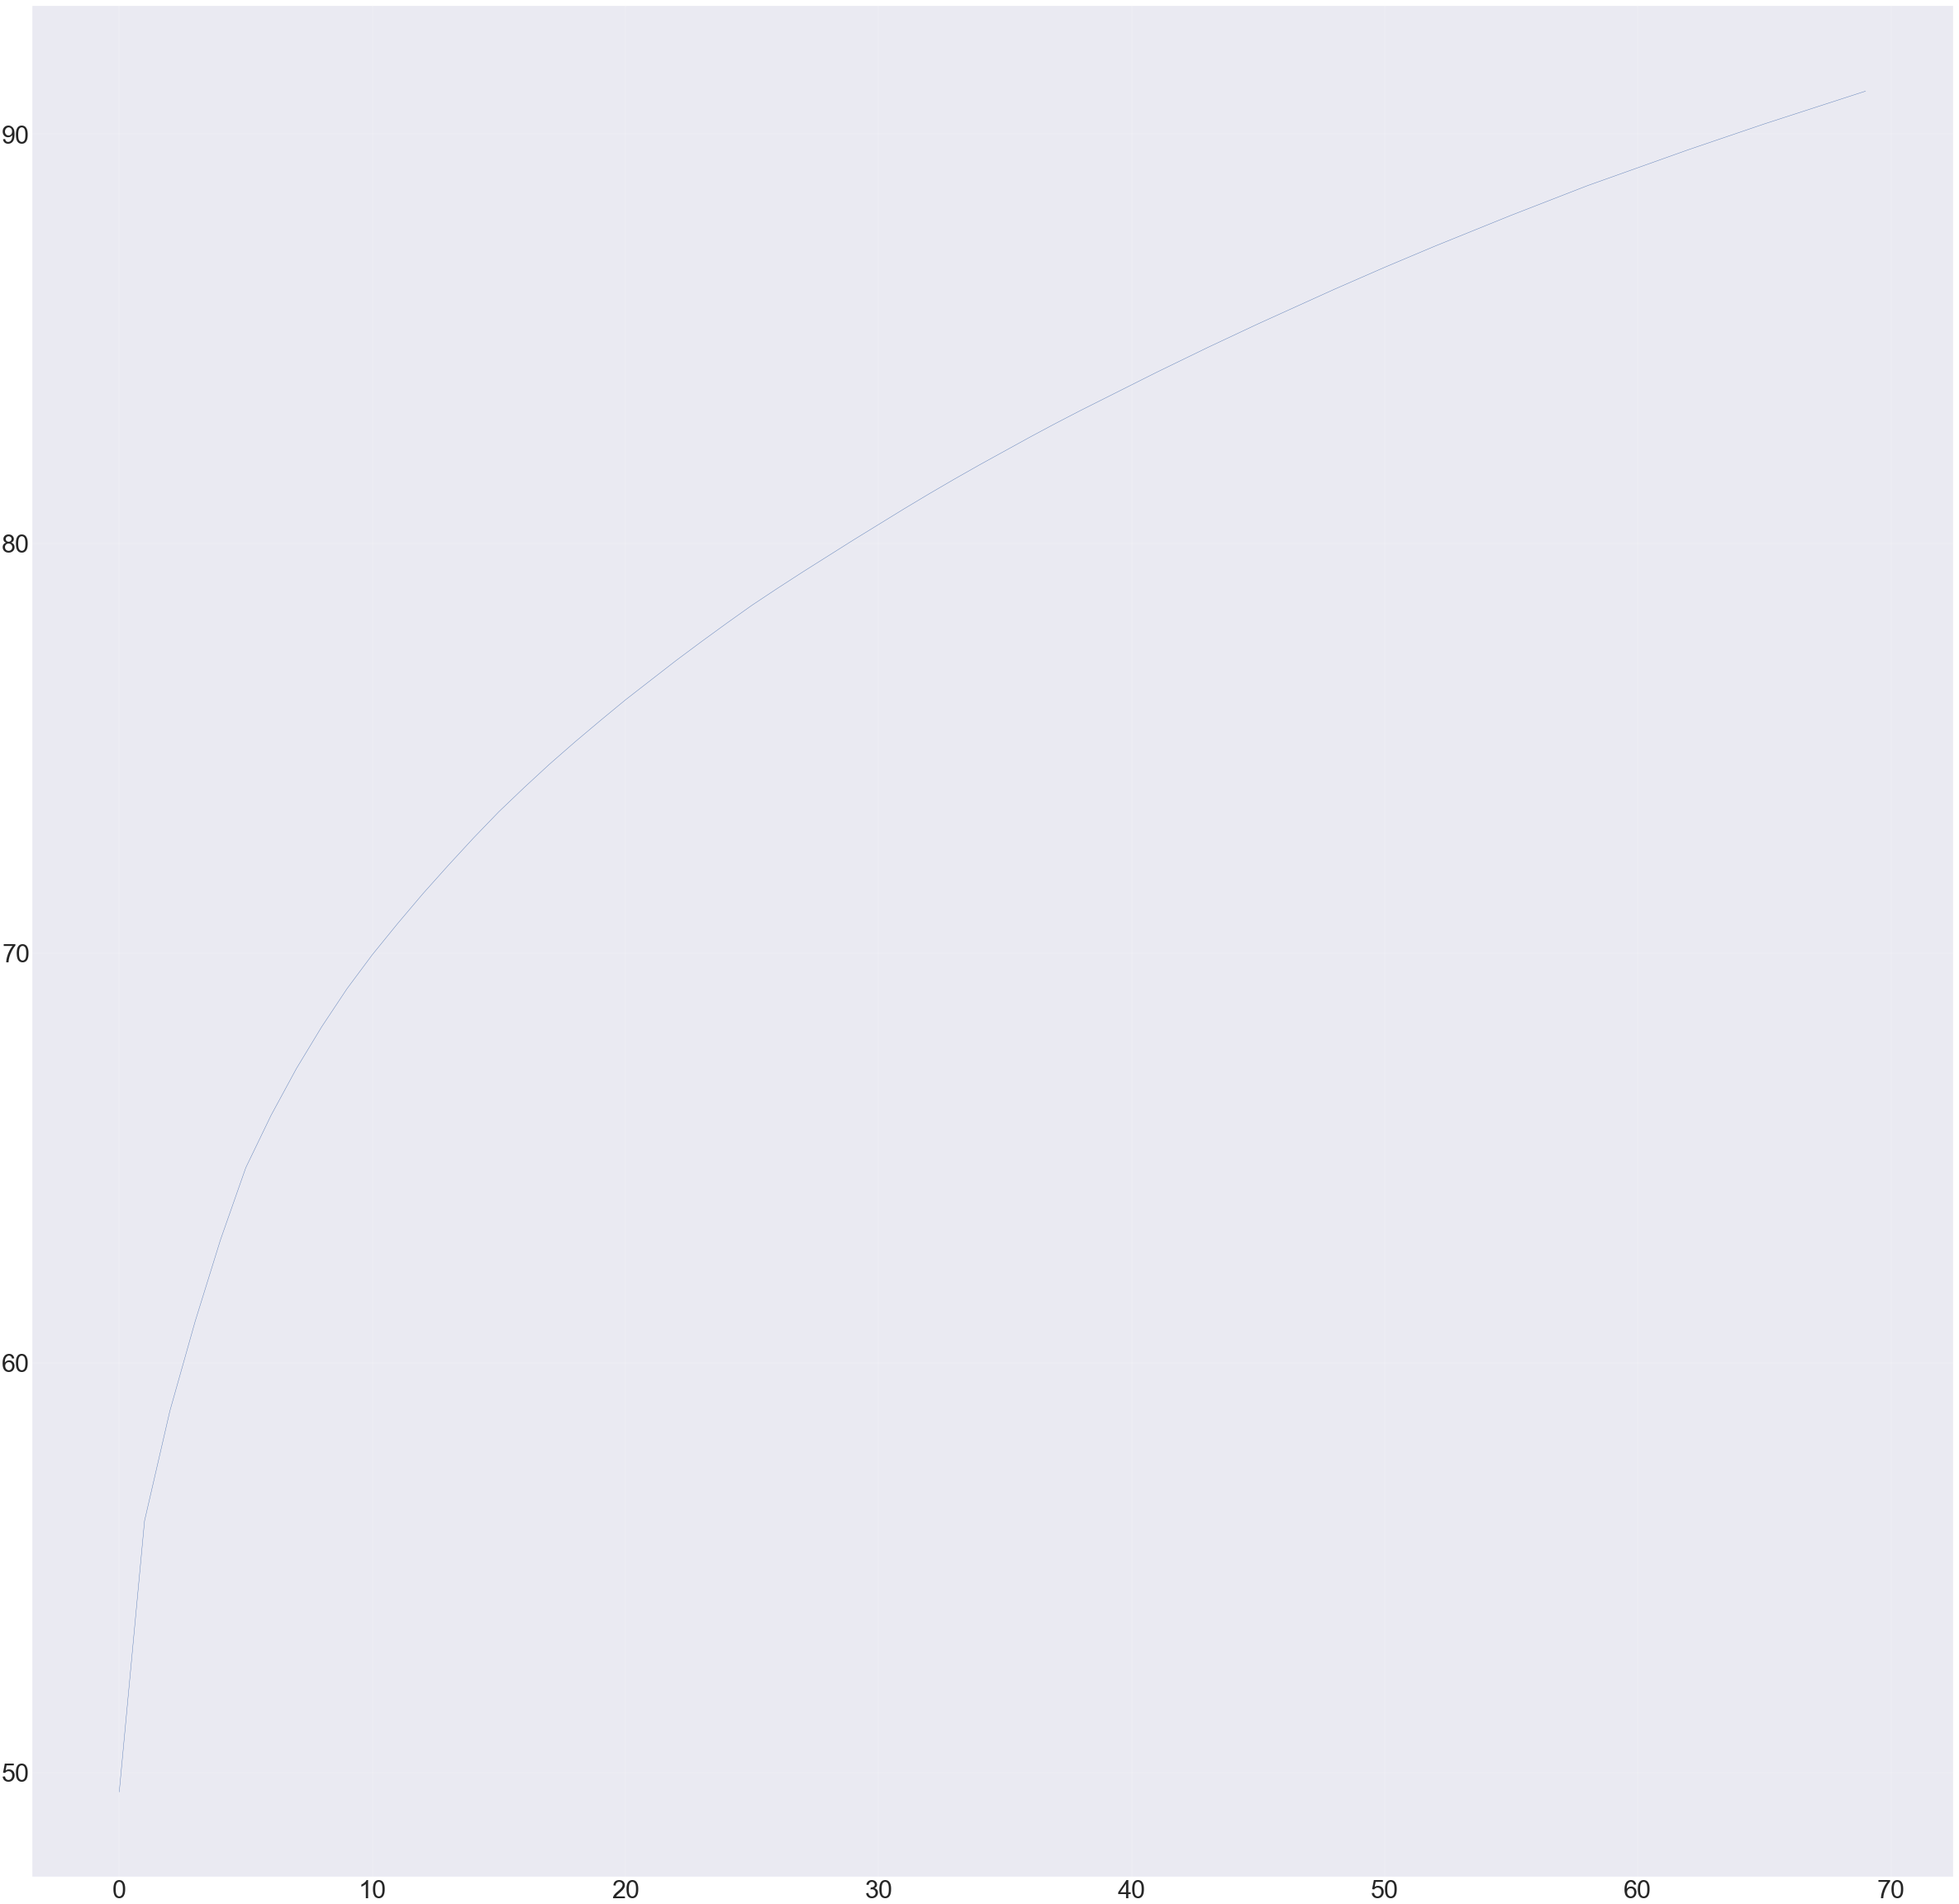

In [62]:
plt.plot(var1)

In [138]:
X = principalDf

In [139]:
X.shape

(1007, 70)

In [140]:
X.isnull().values.all()

False

In [141]:
np.isfinite(X).values.all()

True

### generating train and test split out of PCA dataset

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(805, 70) (805,)
(202, 70) (202,)


## Random Forest with PCA on the whole dataset

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for n in [50,100,200,300,400]:
    for m in range(1,20):
        clf = RandomForestClassifier(n_estimators=n, max_depth=m,
                             random_state=0)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        print("depth = " + str(m) +", n = "+ str(n)+ ", acc = " + str(np.mean(scores)))

depth = 1, n = 50, acc = 0.6645833333333332
depth = 2, n = 50, acc = 0.6645833333333332
depth = 3, n = 50, acc = 0.6658179012345679
depth = 4, n = 50, acc = 0.6633333333333333
depth = 5, n = 50, acc = 0.6633333333333333


KeyboardInterrupt: 

In [144]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5,
                             random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  

0.6534653465346535

In [145]:
clf.score(X_train,y_train)

0.7739130434782608

## KNN with PCA on the whole dataset

In [147]:
from sklearn.neighbors import KNeighborsClassifier  
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(classifier, X_train, y_train, cv=10)
    print("k = "+ str(k)+ ", acc = " + str(np.mean(scores)))

k = 1, acc = 0.5925925925925927
k = 2, acc = 0.5217283950617284
k = 3, acc = 0.5912654320987654
k = 4, acc = 0.5652623456790122
k = 5, acc = 0.644753086419753
k = 6, acc = 0.6111265432098765
k = 7, acc = 0.639753086419753
k = 8, acc = 0.6285339506172841
k = 9, acc = 0.6509567901234568
k = 10, acc = 0.6422839506172839
k = 11, acc = 0.6634413580246914
k = 12, acc = 0.6434104938271605
k = 13, acc = 0.6546604938271605
k = 14, acc = 0.6472067901234568
k = 15, acc = 0.6608179012345679
k = 16, acc = 0.6533796296296297
k = 17, acc = 0.6683333333333334
k = 18, acc = 0.6633333333333333
k = 19, acc = 0.6658333333333333
k = 20, acc = 0.6733024691358025
k = 21, acc = 0.675817901234568
k = 22, acc = 0.6721141975308642
k = 23, acc = 0.673317901234568
k = 24, acc = 0.6683024691358026
k = 25, acc = 0.6769753086419753
k = 26, acc = 0.6732253086419754
k = 27, acc = 0.6769753086419753
k = 28, acc = 0.6732407407407407
k = 29, acc = 0.674537037037037
k = 30, acc = 0.6695370370370369
k = 31, acc = 0.67083333

In [148]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=29)  
scores = cross_val_score(classifier, principalDf, y, cv=10)
print(" acc = " + str(np.mean(scores)))

 acc = 0.6713465346534653


We didn't even reach an accuracy of 0.7 both using KNN and Random Forest, we can do better without using PCA.
Let's try to perform the same approaches, using KNN and RF on the standard prerocessed dataset

## KNN 

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2,random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(805, 149) (805,)
(202, 149) (202,)


In [162]:
from sklearn.neighbors import KNeighborsClassifier  
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(classifier, X_train, y_train, cv=10)
    print("k = "+ str(k)+ ", acc = " + str(np.mean(scores)))

k = 1, acc = 0.5837962962962961
k = 2, acc = 0.5390895061728396
k = 3, acc = 0.5937808641975308
k = 4, acc = 0.5725925925925925
k = 5, acc = 0.6222685185185184
k = 6, acc = 0.5925462962962963
k = 7, acc = 0.643641975308642
k = 8, acc = 0.6124537037037037
k = 9, acc = 0.6584104938271605
k = 10, acc = 0.6285802469135803
k = 11, acc = 0.6596604938271604
k = 12, acc = 0.6484722222222221
k = 13, acc = 0.6646296296296297
k = 14, acc = 0.6596141975308643
k = 15, acc = 0.665756172839506
k = 16, acc = 0.6545524691358025
k = 17, acc = 0.6682561728395061
k = 18, acc = 0.6719598765432099
k = 19, acc = 0.6745370370370372
k = 20, acc = 0.6695524691358025
k = 21, acc = 0.6758333333333333
k = 22, acc = 0.6720370370370371
k = 23, acc = 0.6707716049382715
k = 24, acc = 0.6645987654320987
k = 25, acc = 0.675787037037037
k = 26, acc = 0.6683024691358024
k = 27, acc = 0.6794907407407407
k = 28, acc = 0.6732561728395061
k = 29, acc = 0.6782253086419753
k = 30, acc = 0.6769907407407407
k = 31, acc = 0.685679

Best k is k=32, now we can fit the model using the training set with this k and see what happens

In [154]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=32)  
classifier.fit(X_train,y_train)
print("acc = " + str(classifier.score(X_test,y_test)))

acc = 0.7376237623762376


In [155]:
print("acc = " + str(classifier.score(X_train,y_train)))

acc = 0.6906832298136646


We got a pretty high accuracy without overfitting, how we can see looking at the accuracy on the training set, 
however we can see how changing the random seed of the train_test_split function the results change considerably

In [157]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset, y, test_size=0.2,random_state = 47)
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(805, 149) (805,)
(202, 149) (202,)


In [161]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=32)  
classifier.fit(X_train2,y_train2)
print("acc = " + str(classifier.score(X_test2,y_test2)))

acc = 0.6336633663366337


We don't want a classifier that is so much prone to the randomness of the train and test split, let' see how Random Forest performs

### Random Forest

Now we can apply the same reasoning to the Random forests, to tune the max_depth and the n_estimators

In [115]:
from sklearn.ensemble import RandomForestClassifier

for n in [50,100,200,300,400]:
    for m in range(1,20):
        clf = RandomForestClassifier(n_estimators=n, max_depth=m,
                             random_state=0)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        print("depth = " + str(m) +", n = "+ str(n)+ ", acc = " + str(np.mean(scores)))

depth = 1, n = 50, acc = 0.6584104938271604
depth = 2, n = 50, acc = 0.6584104938271604
depth = 3, n = 50, acc = 0.6745524691358024
depth = 4, n = 50, acc = 0.6820216049382715
depth = 5, n = 50, acc = 0.6957098765432099
depth = 6, n = 50, acc = 0.7006172839506173
depth = 7, n = 50, acc = 0.7130092592592592
depth = 8, n = 50, acc = 0.7067746913580246
depth = 9, n = 50, acc = 0.7055864197530863
depth = 10, n = 50, acc = 0.706820987654321
depth = 11, n = 50, acc = 0.7216975308641975
depth = 12, n = 50, acc = 0.7019135802469136
depth = 13, n = 50, acc = 0.7031635802469136
depth = 14, n = 50, acc = 0.7118055555555555
depth = 15, n = 50, acc = 0.6993981481481482
depth = 16, n = 50, acc = 0.7068364197530863
depth = 17, n = 50, acc = 0.7068209876543209
depth = 18, n = 50, acc = 0.708070987654321
depth = 19, n = 50, acc = 0.708070987654321
depth = 1, n = 100, acc = 0.6584104938271604
depth = 2, n = 100, acc = 0.6584104938271604
depth = 3, n = 100, acc = 0.6683179012345679
depth = 4, n = 100, ac

We can see that the best accuracy is obtained when we have max_depth=15 and n_estimators=200, let's see how we perform building the model on the training set and testing with cross validation on the whole dataset

In [163]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=15,
                             random_state=0)
clf.fit(X_train,y_train)
print("test acc = " + str(clf.score(X_test,y_test)))

acc = 0.7326732673267327


The best result that we got is 0.7326732673267327 with n_estimators = 200 and max_depth = 15 using Random Forests. 
What can we check now is how things change by varying the random seed used to split the training and test set.

In [225]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=15,
                             random_state=0)
clf.fit(X_train2,y_train2)
print("test acc = " + str(clf.score(X_test2,y_test2)))

test acc = 0.693069306930693


The result are slightly worse than in the previus case, however we still got an accuracy around 70%, that is much better 
compared with KNN, for which the accuracy dropped of 10% by changing the seed. 
We can conclude that Random Forests are a more robust classifier, reason why until now they represent the best obtained results. 

Another approach than we can try is to train a random forest classifier, this, will select by itself the most relevant features. 
Then, we can pick these most frequent features and use them to feed a new Random Forest.

## Random Forest with Most Relevant Features

In [226]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2,random_state = 0)
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=200, max_depth=15,
                             random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7326732673267327

In [227]:
clf.feature_importances_

array([0.00467063, 0.00483833, 0.00611114, 0.00517604, 0.00554872,
       0.00562861, 0.00604297, 0.00573252, 0.006854  , 0.00501099,
       0.00633595, 0.0073599 , 0.00580907, 0.00789708, 0.00864184,
       0.00789934, 0.00792434, 0.00464674, 0.00651439, 0.00319841,
       0.00616238, 0.00537937, 0.00675574, 0.00507362, 0.00737551,
       0.00809885, 0.01109319, 0.00756743, 0.00758416, 0.0058558 ,
       0.0054274 , 0.00466834, 0.01326776, 0.00572639, 0.00605264,
       0.00686364, 0.00439271, 0.00816474, 0.00781654, 0.007109  ,
       0.00515173, 0.00802017, 0.00768024, 0.00948579, 0.00558645,
       0.00645566, 0.00807699, 0.00576319, 0.00581954, 0.00571852,
       0.00503156, 0.00460938, 0.0063686 , 0.00537107, 0.00683151,
       0.00857182, 0.00482006, 0.00560979, 0.0071821 , 0.00775614,
       0.00408945, 0.00771475, 0.00623006, 0.00588191, 0.004763  ,
       0.00458839, 0.00609314, 0.0081411 , 0.00578343, 0.00595155,
       0.00600189, 0.0051106 , 0.00751168, 0.00423768, 0.00299

I want to train a RandomForest classifier with the most important features given by the Random Forests on the whole dataset

In [228]:
mostImp=[]
for i in range(len(clf.feature_importances_)):
    if(clf.feature_importances_[i]>0.007):
        mostImp.append(i)
len(mostImp)

48

In [229]:
columns=[]
for i in mostImp:
    columns.append(dataset.iloc[:,i])
len(columns)

48

In [230]:
newDf = pd.DataFrame()
for i in range(len(columns)):
    newDf[i] = columns[i]
newDf.head()

0    1    2    3    4    5    6    7    8    9   ...    38   39   40   41  \
0  1.0  1.0  3.0  1.0  1.0  4.0  1.0  5.0  5.0  3.0  ...   5.0  1.0  1.0  2.0   
1  1.0  1.0  4.0  4.0  2.0  4.0  1.0  3.0  5.0  4.0  ...   4.0  1.0  5.0  5.0   
2  1.0  3.0  5.0  5.0  5.0  4.0  2.0  5.0  5.0  2.0  ...   4.0  4.0  3.0  4.0   
3  2.0  1.0  2.0  5.0  1.0  4.0  3.0  1.0  2.0  5.0  ...   3.0  3.0  1.0  1.0   
4  5.0  2.0  1.0  2.0  4.0  3.0  3.0  4.0  4.0  3.0  ...   5.0  2.0  3.0  4.0   

    42   43  44    45     46    47  
0  3.0  4.0   1  20.0  163.0  48.0  
1  3.0  2.0   5  19.0  163.0  58.0  
2  5.0  3.0   4  20.0  176.0  67.0  
3  4.0  2.0   4  22.0  172.0  59.0  
4  3.0  3.0   2  20.0  170.0  59.0  

[5 rows x 48 columns]

In [231]:
from sklearn.model_selection import train_test_split
X_trainRFbest, X_testRFbest, y_trainRFbest, y_testRFbest = train_test_split(newDf, y, test_size=0.2,random_state = 0)

In [236]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=200, max_depth=15,
                             random_state=0)
clf.fit(X_trainRFbest, y_trainRFbest)
scores = cross_val_score(clf, newDf, y, cv=10)
scores

array([0.75247525, 0.63366337, 0.74257426, 0.74257426, 0.75247525,
       0.67326733, 0.73267327, 0.71      , 0.71      , 0.79      ])

In [238]:
print("test acc = " + str(np.mean(scores)))
print("train acc = " + str(np.mean(scores)))

max_depth = 4,test acc = 0.723970297029703


As we can see the results are sliglthly worse than doing Random Forest on the whole dataset.

Right now, the best result we get is an accuracy of 0.732 with Random Forests that should perform a little bit of feature selection by themselves, What we can do to try to improve this result is changing the algorithm.
Another approach that I want to try is Ridge Classification, this kind of classifier can be helpful because it aims at reducing the magnitude of the attribute values, in our dataset we have columns like Height, Weight and age itself that can assume a wide range of values, in contrast with the most part of features that go from 1 to 5. Let's see how this works. 

## RIDGE Classifier

let's start by tuning the alpha hyperparameter

In [200]:
for i in [0.5,5,50,100,200,400,800,1000,2000]:
    clf = RidgeClassifier(alpha=i,fit_intercept=True)
    scores = cross_val_score(clf,X_train,y_train,cv=10)
    print("alpha = "+ str(i) +" , acc = " + str(np.mean(scores)))

alpha = 0.5 , acc = 0.6917901234567901
alpha = 5 , acc = 0.6917901234567901
alpha = 50 , acc = 0.6992438271604939
alpha = 100 , acc = 0.704212962962963
alpha = 200 , acc = 0.7055092592592593
alpha = 400 , acc = 0.7178858024691358
alpha = 800 , acc = 0.7141203703703703
alpha = 1000 , acc = 0.7203395061728395
alpha = 2000 , acc = 0.7080092592592593


In [213]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=1000,fit_intercept=True)
clf.fit(X_train,y_train)
print("test acc = " + str(clf.score(X_test,y_test)))
print("train accuracy = " + str( clf.score(X_train, y_train)))

test acc = 0.7227722772277227
train acc = 0.7850931677018633


In [199]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=1000,fit_intercept=True)
clf.fit(X_train2,y_train2)
print("test acc = " + str(clf.score(X_test2,y_test2)))
print("train accuracy = " + str( clf.score(X_train2, y_train2)))

test acc = 0.698019801980198
train acc = 0.782608695652174


As we can see from the results above, not only we are not overfitting, but also, by considering two different train/test split we noticed that the Ridge Classifier results are slightly better of Random Forest ones, in fact we are overfitting less and the accuracy is comparable.
This is the best result for now, on the train/test split with random seed '0' we got an accuracy of 0.722

Still focusing on the problem of having so many features and so few examples, I want to try to perform feature selection selecting 
the k best features with respect to  chi squared and f classification measures and I'm gonna apply them to the best model we have so far, 
Ridge.

## Select K best w.r.t chi2 & f_classif

In [202]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=50).fit_transform(dataset, y)
X_new.shape

(1007, 50)

### Ridge

In [239]:
#### Chi-squared

In [203]:
X_trainChi2, X_testChi2, y_trainChi2, y_testChi2 = train_test_split(X_new, y, test_size=0.2,random_state = 0)

In [208]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=1000).fit(X_trainChi2, y_trainChi2)
print("test accuracy = " + str( clf.score(X_testChi2, y_testChi2) ))
print("train accuracy = " + str( clf.score(X_trainChi2, y_trainChi2)))

test accuracy = 0.7673267326732673
train accuracy = 0.737888198757764


What about a different split?

In [209]:
X_trainChi2, X_testChi2, y_trainChi2, y_testChi2 = train_test_split(X_new, y, test_size=0.2,random_state = 47)

In [245]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=1000).fit(X_trainChi2, y_trainChi2)
print("test accuracy = " + str( clf.score(X_testChi2, y_testChi2)))
print("train accuracy = " + str( clf.score(X_trainChi2, y_trainChi2)))

test accuracy = 0.693069306930693
train accuracy = 0.7565217391304347


#### f-classification

In [215]:
from sklearn.feature_selection import f_classif
X_new2 = SelectKBest(f_classif, k=70).fit_transform(dataset, y)
X_new2.shape

(1007, 70)

In [243]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_new2, y, test_size=0.2,random_state = 0)

In [244]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=1000).fit(X_trainf, y_trainf)
print("test accuracy = " + str( clf.score(X_testf, y_testf) ))
print("train accuracy = " + str( clf.score(X_trainf, y_trainf) ))

test accuracy = 0.7772277227722773
train accuracy = 0.7503105590062111


In [221]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_new2, y, test_size=0.2,random_state = 47)

In [241]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=1000).fit(X_trainf, y_trainf)
print("test accuracy = " + str( clf.score(X_testf, y_testf) ))
print("train accuracy = " + str( clf.score(X_trainf, y_trainf) ))

test accuracy = 0.693069306930693
train accuracy = 0.7614906832298136


What clearly comes out here is that we outperformed the previous ridge classification, in fact we got 0.777 of accuracy using selectKbest with
f-classification measure, that is our best result so far and 0.767 using chi2 measure, considering the split correspondent to random seed '0'.
If we change the random seed the results are comparable with Random Forest ones, however in this case we are not overfitting at all, that is a 
valid parameter to prove that we are generalizing well.

Looking at these results, what we can understand is that
probably the split with random seed = 0 is a lucky one, performances with every approach are better than with a different split. 
In particular, we may also notice that with ridge we are underfitting a little bit, in fact to obtain meaningful performances we have to push the alpha parameter till 1000, and this is clear since once we get a test accuracy higher than a training accuracy. 
By concluding, I still want to remark how every approach is strongly affected by the limited size of the dataset, however I think that a good balance among performances, overfitting and underfitting consist in the Ridge classifier applied to the whole preprocessed dataset, without performing feature selection with chi2 or f-classification.

## Conclusion

By concluding, I still want to remark how every approach is strongly affected by the limited size of the dataset, however I think that a good balance among performances, overfitting and underfitting consists in the Ridge classifier applied to the whole preprocessed dataset, without performing feature selection with chi2 or f-classification.